In [2]:
import numpy as np
import pandas as pd
from sklearn.manifold import LocallyLinearEmbedding
import matplotlib.pyplot as plt
from sklearn.decomposition import  PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import joblib

In [3]:
# Load astronomy data
data = pd.read_csv('../../Data/DR3/espectros_normalizadosSY.csv')


In [4]:
df_data = pd.DataFrame(data)

In [5]:
df_data

0         1         2         3         4         5         6  \
0    0.298540  0.288910  0.270728  0.265745  0.281003  0.287176  0.266657   
1    0.187321  0.059904  0.040154  0.150801  0.259516  0.217557  0.058846   
2    0.354986  0.452690  0.350241  0.240637  0.276160  0.357691  0.339475   
3    0.258981  0.205888  0.125221  0.119809  0.177436  0.203863  0.167638   
4    0.058639  0.059465  0.030795  0.017400  0.030421  0.038995  0.027836   
..        ...       ...       ...       ...       ...       ...       ...   
188  0.222240  0.100221  0.044504  0.065901  0.097564  0.100197  0.081363   
189  0.209241  0.241842  0.231943  0.195540  0.216914  0.263101  0.232148   
190  0.469036  0.418741  0.588243  0.843116  1.000000  0.922588  0.615408   
191  0.092077  0.080549  0.089059  0.102926  0.110376  0.107294  0.094674   
192  0.075513  0.068851  0.073665  0.076519  0.075982  0.078129  0.082565   

            7         8         9  ...       334       335       336  \
0    0.239145  0.244118  0.270922  ...  0.893952  0.907187  0.906909   
1    0.153158  0.151218  0.288894  ...  0.513965  0.522141  0.529018   
2    0.259200  0.261950  0.319587  ...  0.757199  0.692856  0.618022   
3    0.136339  0.164524  0.195191  ...  0.389137  0.420764  0.450557   
4    0.020623  0.035006  0.044762  ...  0.878500  0.897841  0.905135   
..        ...       ...       ...  ...       ...       ...       ...   
188  0.068870  0.092488  0.142955  ...  0.746336  0.798232  0.839520   
189  0.143073  0.154275  0.280540  ...  0.729426  0.734261  0.728344   
190  0.245139  0.064415  0.139017  ...  0.593132  0.634211  0.667228   
191  0.076398  0.067334  0.076202  ...  0.169598  0.179376  0.188147   
192  0.079795  0.073212  0.077379  ...  0.804685  0.841586  0.867925   

          337       338       339       340       341       342  id  
0    0.920086  0.939917  0.944382  0.975344  0.975237  1.000000   1  
1    0.552321  0.589843  0.627874  0.693038  0.742824  0.814167   1  
2    0.563389  0.534353  0.529347  0.580790  0.659196  0.799375   1  
3    0.487642  0.524829  0.544773  0.566638  0.553427  0.534909   1  
4    0.926023  0.952516  0.960777  0.991910  0.986293  1.000000   1  
..        ...       ...       ...       ...       ...       ...  ..  
188  0.890440  0.941144  0.964865  1.000000  0.984885  0.975152   1  
189  0.734119  0.746700  0.749235  0.775427  0.779711  0.806542   1  
190  0.709789  0.756071  0.786710  0.835245  0.852406  0.886589   1  
191  0.200449  0.213928  0.222166  0.233527  0.233113  0.233347   1  
192  0.906134  0.947060  0.965115  1.000000  0.990916  0.994234   1  

[193 rows x 344 columns]

In [6]:
df_data.shape

(193, 344)

In [7]:
data_t =  df_data.T


In [8]:
data_t =  data_t.drop(labels='id', axis=0)
data.drop(columns='id', inplace=True)

In [9]:
data.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 343 columns):
 #    Column  Dtype  
---   ------  -----  
 0    0       float64
 1    1       float64
 2    2       float64
 3    3       float64
 4    4       float64
 5    5       float64
 6    6       float64
 7    7       float64
 8    8       float64
 9    9       float64
 10   10      float64
 11   11      float64
 12   12      float64
 13   13      float64
 14   14      float64
 15   15      float64
 16   16      float64
 17   17      float64
 18   18      float64
 19   19      float64
 20   20      float64
 21   21      float64
 22   22      float64
 23   23      float64
 24   24      float64
 25   25      float64
 26   26      float64
 27   27      float64
 28   28      float64
 29   29      float64
 30   30      float64
 31   31      float64
 32   32      float64
 33   33      float64
 34   34      float64
 35   35      float64
 36   36      float64
 37   37      float64
 38   38      

In [10]:
data_t

0         1         2         3         4         5         6    \
0    0.298540  0.187321  0.354986  0.258981  0.058639  0.127025  0.263424   
1    0.288910  0.059904  0.452690  0.205888  0.059465  0.112698  0.247204   
2    0.270728  0.040154  0.350241  0.125221  0.030795  0.126630  0.215453   
3    0.265745  0.150801  0.240637  0.119809  0.017400  0.138573  0.202827   
4    0.281003  0.259516  0.276160  0.177436  0.030421  0.161102  0.220524   
..        ...       ...       ...       ...       ...       ...       ...   
338  0.939917  0.589843  0.534353  0.524829  0.952516  0.558574  0.694216   
339  0.944382  0.627874  0.529347  0.544773  0.960777  0.593588  0.711965   
340  0.975344  0.693038  0.580790  0.566638  0.991910  0.626917  0.738086   
341  0.975237  0.742824  0.659196  0.553427  0.986293  0.615725  0.726844   
342  1.000000  0.814167  0.799375  0.534909  1.000000  0.591188  0.719130   

          7         8         9    ...       183       184       185  \
0    0.137186  0.038319  0.004025  ...  0.217188  0.058830  0.062701   
1    0.127671  0.036264  0.037465  ...  0.203986  0.042714  0.051280   
2    0.113152  0.043753  0.002914  ...  0.182851  0.060083  0.035860   
3    0.120532  0.051959  0.002079  ...  0.181244  0.064785  0.025374   
4    0.144595  0.056293  0.034851  ...  0.203233  0.053816  0.021897   
..        ...       ...       ...  ...       ...       ...       ...   
338  0.968682  0.934617  0.814085  ...  0.653324  0.096235  0.944032   
339  0.974340  0.953822  0.857362  ...  0.659660  0.103511  0.942323   
340  1.000000  0.992001  0.920333  ...  0.684175  0.109343  0.969789   
341  0.986032  0.988849  0.949721  ...  0.686110  0.106423  0.970195   
342  0.989779  1.000000  1.000000  ...  0.704314  0.100465  1.000000   

          186       187       188       189       190       191       192  
0    0.028283  0.254761  0.222240  0.209241  0.469036  0.092077  0.075513  
1    0.033894  0.255235  0.100221  0.241842  0.418741  0.080549  0.068851  
2    0.027066  0.165484  0.044504  0.231943  0.588243  0.089059  0.073665  
3    0.016990  0.107800  0.065901  0.195540  0.843116  0.102926  0.076519  
4    0.017465  0.151362  0.097564  0.216914  1.000000  0.110376  0.075982  
..        ...       ...       ...       ...       ...       ...       ...  
338  0.979325  0.741518  0.941144  0.746700  0.756071  0.213928  0.947060  
339  0.978305  0.742001  0.964865  0.749235  0.786710  0.222166  0.965115  
340  1.000000  0.765231  1.000000  0.775427  0.835245  0.233527  1.000000  
341  0.985799  0.766185  0.984885  0.779711  0.852406  0.233113  0.990916  
342  0.993959  0.788755  0.975152  0.806542  0.886589  0.233347  0.994234  

[343 rows x 193 columns]

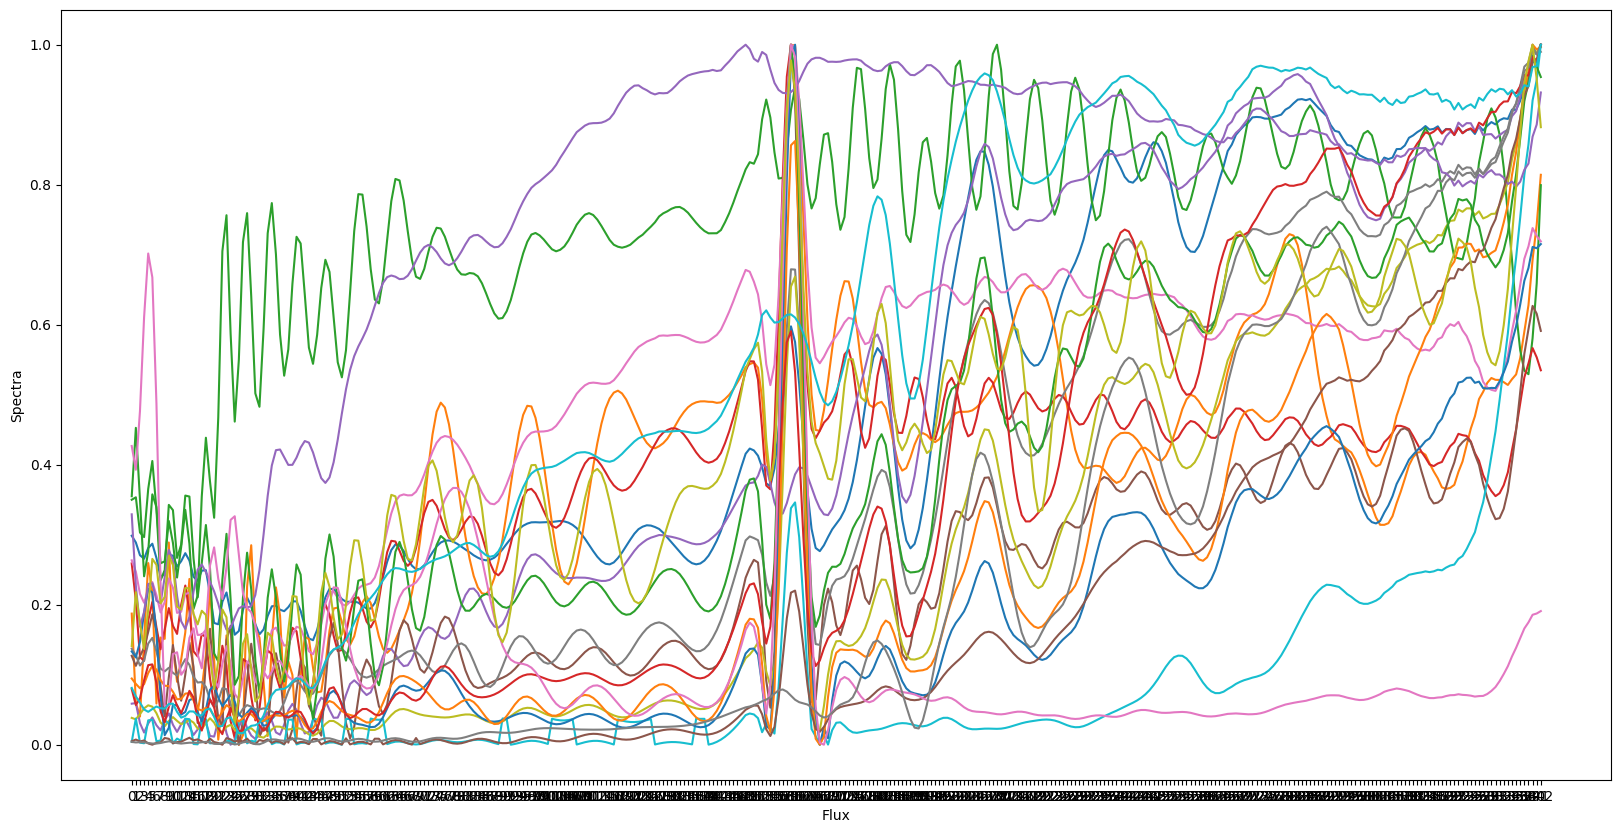

In [11]:
plt.figure(figsize=(20,10))
plt.xlabel("Flux")
plt.ylabel("Spectra")
plt.plot(data_t.iloc[:, 0:20])

n_components = 1
Explained variance ratio: 0.68079
n_components = 2
Explained variance ratio: 0.90108
n_components = 3
Explained variance ratio: 0.93726
n_components = 4
Explained variance ratio: 0.96038
n_components = 5
Explained variance ratio: 0.97100
n_components = 6
Explained variance ratio: 0.97647
n_components = 7
Explained variance ratio: 0.97978
n_components = 8
Explained variance ratio: 0.98273
n_components = 9
Explained variance ratio: 0.98512
n_components = 10
Explained variance ratio: 0.98729
n_components = 11
Explained variance ratio: 0.98896
n_components = 12
Explained variance ratio: 0.99019
n_components = 13
Explained variance ratio: 0.99110
n_components = 14
Explained variance ratio: 0.99192
n_components = 15
Explained variance ratio: 0.99266
n_components = 16
Explained variance ratio: 0.99327
n_components = 17
Explained variance ratio: 0.99386
n_components = 18
Explained variance ratio: 0.99433
n_components = 19
Explained variance ratio: 0.99477
n_components = 20
Exp

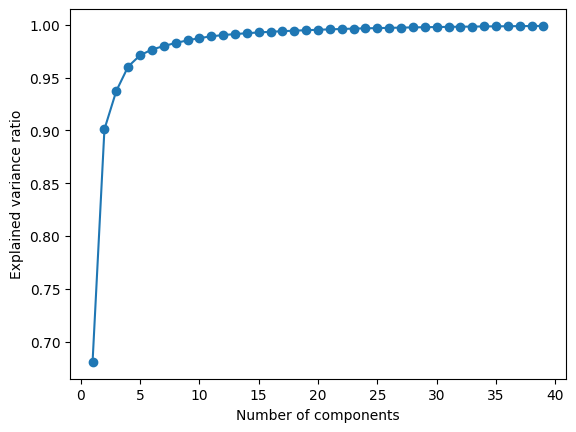

In [12]:
# assume that `data` contains your data
data = df_data.copy()
explained_variances = []
for n_components in range(1, 40):
    pca = PCA(n_components=n_components)
    features_reduced = pca.fit_transform(data)
    explained_variances.append(pca.explained_variance_ratio_.sum())
    print(f"n_components = {n_components}")
    print(f"Explained variance ratio: {explained_variances[-1]:.5f}")

# plot the explained variance ratio as a function of the number of components
import matplotlib.pyplot as plt
plt.plot(range(1, 40), explained_variances, 'o-')
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.show()


In [13]:
data = df_data.copy()
explained_variances = []
for n_components in range(1, 41):
    pca = PCA(n_components=n_components)
    features_reduced = pca.fit_transform(data)
    explained_variances.append(pca.explained_variance_ratio_.sum())
    print(f"n_components = {n_components}")
    print(f"Explained variance ratio: {explained_variances[-1]:.6f}")

n_components = 1
Explained variance ratio: 0.680787
n_components = 2
Explained variance ratio: 0.901083
n_components = 3
Explained variance ratio: 0.937262
n_components = 4
Explained variance ratio: 0.960380
n_components = 5
Explained variance ratio: 0.971004
n_components = 6
Explained variance ratio: 0.976471
n_components = 7
Explained variance ratio: 0.979777
n_components = 8
Explained variance ratio: 0.982730
n_components = 9
Explained variance ratio: 0.985122
n_components = 10
Explained variance ratio: 0.987294
n_components = 11
Explained variance ratio: 0.988959
n_components = 12
Explained variance ratio: 0.990189
n_components = 13
Explained variance ratio: 0.991097
n_components = 14
Explained variance ratio: 0.991924
n_components = 15
Explained variance ratio: 0.992655
n_components = 16
Explained variance ratio: 0.993270
n_components = 17
Explained variance ratio: 0.993861
n_components = 18
Explained variance ratio: 0.994328
n_components = 19
Explained variance ratio: 0.994771
n_

In [14]:
pca = PCA()
pipeline = Pipeline(steps=[('pca', pca)])

param_grid = {
    'pca__n_components': np.arange(10,80),
    'pca__svd_solver': ['auto', 'full', 'arpack', 'randomized']
}

grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5)

grid_search.fit(data)
best_params = grid_search.best_params_

best_pca = PCA(n_components=best_params['pca__n_components'], svd_solver=best_params['pca__svd_solver'])
new_pipeline = Pipeline(steps=[('pca', best_pca)])
new_pipeline.fit(data)
print(new_pipeline.named_steps['pca'])


PCA(n_components=39)


In [15]:
data

0         1         2         3         4         5         6  \
0    0.298540  0.288910  0.270728  0.265745  0.281003  0.287176  0.266657   
1    0.187321  0.059904  0.040154  0.150801  0.259516  0.217557  0.058846   
2    0.354986  0.452690  0.350241  0.240637  0.276160  0.357691  0.339475   
3    0.258981  0.205888  0.125221  0.119809  0.177436  0.203863  0.167638   
4    0.058639  0.059465  0.030795  0.017400  0.030421  0.038995  0.027836   
..        ...       ...       ...       ...       ...       ...       ...   
188  0.222240  0.100221  0.044504  0.065901  0.097564  0.100197  0.081363   
189  0.209241  0.241842  0.231943  0.195540  0.216914  0.263101  0.232148   
190  0.469036  0.418741  0.588243  0.843116  1.000000  0.922588  0.615408   
191  0.092077  0.080549  0.089059  0.102926  0.110376  0.107294  0.094674   
192  0.075513  0.068851  0.073665  0.076519  0.075982  0.078129  0.082565   

            7         8         9  ...       334       335       336  \
0    0.239145  0.244118  0.270922  ...  0.893952  0.907187  0.906909   
1    0.153158  0.151218  0.288894  ...  0.513965  0.522141  0.529018   
2    0.259200  0.261950  0.319587  ...  0.757199  0.692856  0.618022   
3    0.136339  0.164524  0.195191  ...  0.389137  0.420764  0.450557   
4    0.020623  0.035006  0.044762  ...  0.878500  0.897841  0.905135   
..        ...       ...       ...  ...       ...       ...       ...   
188  0.068870  0.092488  0.142955  ...  0.746336  0.798232  0.839520   
189  0.143073  0.154275  0.280540  ...  0.729426  0.734261  0.728344   
190  0.245139  0.064415  0.139017  ...  0.593132  0.634211  0.667228   
191  0.076398  0.067334  0.076202  ...  0.169598  0.179376  0.188147   
192  0.079795  0.073212  0.077379  ...  0.804685  0.841586  0.867925   

          337       338       339       340       341       342  id  
0    0.920086  0.939917  0.944382  0.975344  0.975237  1.000000   1  
1    0.552321  0.589843  0.627874  0.693038  0.742824  0.814167   1  
2    0.563389  0.534353  0.529347  0.580790  0.659196  0.799375   1  
3    0.487642  0.524829  0.544773  0.566638  0.553427  0.534909   1  
4    0.926023  0.952516  0.960777  0.991910  0.986293  1.000000   1  
..        ...       ...       ...       ...       ...       ...  ..  
188  0.890440  0.941144  0.964865  1.000000  0.984885  0.975152   1  
189  0.734119  0.746700  0.749235  0.775427  0.779711  0.806542   1  
190  0.709789  0.756071  0.786710  0.835245  0.852406  0.886589   1  
191  0.200449  0.213928  0.222166  0.233527  0.233113  0.233347   1  
192  0.906134  0.947060  0.965115  1.000000  0.990916  0.994234   1  

[193 rows x 344 columns]

In [16]:
data.shape

(193, 344)

In [64]:
from sklearn.decomposition import PCA
pca_data = PCA(n_components=30, svd_solver='randomized')
pca_transformed = pca_data.fit_transform(data)
pca_transformed_data = pd.DataFrame(pca_transformed)

In [18]:
pca_transformed_data

0         1         2         3         4         5         6   \
0    4.108484 -0.978587  0.731253 -0.960129  0.201275  0.137467  0.179277   
1    2.085974  2.527459 -0.490039  0.739030 -0.017627  0.620683  0.134330   
2    7.879366  3.122891  2.434664 -0.123891  0.060674 -0.521881 -0.689852   
3    1.644402  2.683968 -0.422511  0.361298  0.047612 -0.135813  0.035345   
4    4.197603 -1.637216 -0.507119 -0.044534  0.915411  0.117412  0.162218   
..        ...       ...       ...       ...       ...       ...       ...   
188  2.642984  0.976727 -0.789262  0.953945 -0.162750  0.931556  0.087433   
189  6.638306  2.044563  0.054692  0.842378 -0.312148 -0.268938  0.176068   
190 -3.187105  1.956508  0.950382 -0.558750 -0.748894  0.888794  0.769685   
191 -2.840304  2.795963 -1.053991 -0.317663  0.360638 -0.252126 -0.157756   
192 -0.511063 -1.555724  0.531067 -0.413905 -0.069181 -0.225468  0.124572   

           7         8         9         10        11        12        13  \
0   -0.066443 -0.098512 -0.052616 -0.012967  0.073318  0.221168  0.072217   
1    0.697011 -0.572091  0.159106  0.170598  0.058413  0.047168  0.295993   
2    0.650847  0.190410  0.229583 -0.349420  0.167822 -0.259229  0.187668   
3   -0.319588 -0.171267 -0.090897  0.149855 -0.067806  0.051852  0.062567   
4    0.153555 -0.004200 -0.240241 -0.144457  0.024048  0.109673 -0.032961   
..        ...       ...       ...       ...       ...       ...       ...   
188  0.693424 -0.371208  0.102966  0.270774  0.010888  0.006195  0.031939   
189 -0.200774  0.020001  0.124822 -0.006077 -0.028804 -0.083287  0.111353   
190 -0.107894  0.533689 -0.090843 -0.417947  0.079875 -0.388118  0.496102   
191 -0.109844 -0.176789  0.086792 -0.101870 -0.110536 -0.023520  0.084311   
192 -0.139343 -0.335224  0.020697  0.168916 -0.035817 -0.078922 -0.096198   

           14        15        16        17        18        19  
0    0.068481  0.020169 -0.015519  0.082614 -0.008923 -0.072976  
1   -0.074534  0.178453 -0.297683  0.088127 -0.147785 -0.089736  
2   -0.210312  0.342959  0.260093 -0.217276  0.099279  0.186962  
3   -0.152190  0.012332  0.111565 -0.031742  0.061923  0.151721  
4   -0.028651 -0.013279 -0.036770 -0.021789  0.072237 -0.055868  
..        ...       ...       ...       ...       ...       ...  
188  0.038020  0.166467 -0.145054 -0.003501  0.051329 -0.030103  
189 -0.008228 -0.011137 -0.055902  0.004924 -0.356712 -0.013977  
190  0.377659 -0.057061  0.205766  0.012217 -0.029465 -0.039445  
191 -0.043504 -0.075150  0.065658  0.007129  0.027260  0.037548  
192  0.123993  0.043070 -0.031265  0.000808 -0.036659  0.002018  

[193 rows x 20 columns]

In [19]:
pca_transformed_data.shape

(193, 20)

In [20]:
original_data = pca_data.inverse_transform(pca_transformed)
original_data

array([[0.30089834, 0.28560338, 0.26148516, ..., 0.97267661, 0.9933715 ,
        1.        ],
       [0.16640596, 0.09606763, 0.10152132, ..., 0.74449552, 0.79499466,
        1.        ],
       [0.35793301, 0.42495236, 0.33105317, ..., 0.64568423, 0.78338565,
        1.        ],
       ...,
       [0.53072248, 0.46449207, 0.61137433, ..., 0.86121645, 0.90997539,
        1.        ],
       [0.08960278, 0.09694482, 0.10343263, ..., 0.2298391 , 0.22636781,
        1.        ],
       [0.09100291, 0.08083181, 0.07524323, ..., 0.9871705 , 0.98606064,
        1.        ]])

In [21]:
pca_transformed_data_t = pca_transformed_data.T
pca_transformed_data_t

0         1         2         3         4         5         6    \
0   4.108484  2.085974  7.879366  1.644402  4.197603 -1.134291  4.005534   
1  -0.978587  2.527459  3.122891  2.683968 -1.637216  1.315988  2.391347   
2   0.731253 -0.490039  2.434664 -0.422511 -0.507119 -0.644369 -0.157835   
3  -0.960129  0.739030 -0.123891  0.361298 -0.044534 -0.601299  0.581549   
4   0.201275 -0.017627  0.060674  0.047612  0.915411  0.123142 -0.169756   
5   0.137467  0.620683 -0.521881 -0.135813  0.117412 -0.024364 -0.087345   
6   0.179277  0.134330 -0.689852  0.035345  0.162218 -0.041245  0.154879   
7  -0.066443  0.697011  0.650847 -0.319588  0.153555 -0.098391 -0.325518   
8  -0.098512 -0.572091  0.190410 -0.171267 -0.004200 -0.154140 -0.086612   
9  -0.052616  0.159106  0.229583 -0.090897 -0.240241 -0.155907 -0.107523   
10 -0.012967  0.170598 -0.349420  0.149855 -0.144457  0.117707  0.069500   
11  0.073318  0.058413  0.167822 -0.067806  0.024048 -0.071349 -0.054269   
12  0.221168  0.047168 -0.259229  0.051852  0.109673 -0.109012  0.080850   
13  0.072217  0.295993  0.187668  0.062567 -0.032961  0.192465  0.025063   
14  0.068481 -0.074534 -0.210312 -0.152190 -0.028651 -0.133797  0.062600   
15  0.020169  0.178453  0.342959  0.012332 -0.013279  0.095432 -0.013000   
16 -0.015519 -0.297683  0.260093  0.111565 -0.036770 -0.022525  0.006669   
17  0.082614  0.088127 -0.217276 -0.031742 -0.021789 -0.024429 -0.032567   
18 -0.008923 -0.147785  0.099279  0.061923  0.072237 -0.321880 -0.101152   
19 -0.072976 -0.089736  0.186962  0.151721 -0.055868 -0.022317 -0.029141   

         7         8         9    ...       183       184       185       186  \
0   1.826805 -0.251690 -4.326817  ...  3.655098 -4.728698  4.203439  3.550850   
1  -1.383290 -1.480773  0.845621  ...  1.576473  3.485601 -1.780387 -1.808581   
2  -0.056244 -0.225781 -0.002431  ... -0.514393 -0.869258 -0.549188 -0.554599   
3  -0.671704 -0.535039  0.703881  ...  0.325828 -0.362659  0.045364 -0.116319   
4  -0.127497 -0.302469  0.072987  ... -0.100108  0.411304  0.884013  0.991514   
5   0.036466 -0.084239  0.255456  ... -0.025011 -0.600041  0.161380  0.257561   
6  -0.011106 -0.063998 -0.132777  ...  0.007619  0.163931  0.100741  0.150740   
7  -0.018456  0.052684 -0.059825  ... -0.295044  0.215189  0.145253  0.220443   
8  -0.008852 -0.066457  0.129459  ...  0.053156 -0.001798  0.105034 -0.005982   
9  -0.077210 -0.021949 -0.491819  ...  0.170286  0.086384 -0.082966 -0.315115   
10 -0.036298  0.056009 -0.004924  ... -0.078399  0.055504 -0.261934 -0.274107   
11  0.026968  0.046584 -0.066521  ... -0.054848  0.079053 -0.028297 -0.065699   
12  0.028443 -0.058893  0.176400  ... -0.067459  0.086963 -0.034647 -0.002977   
13 -0.033106 -0.001645 -0.013528  ... -0.019149 -0.204015 -0.066197 -0.086159   
14  0.041661  0.072142  0.165170  ...  0.008606  0.056327 -0.050138 -0.037603   
15 -0.028207 -0.010007  0.260118  ...  0.026605  0.024055 -0.030248 -0.020981   
16  0.068112 -0.041535  0.083476  ...  0.015841  0.014116 -0.047609 -0.041219   
17 -0.024003 -0.034613 -0.042295  ... -0.012474  0.085103 -0.028893  0.042475   
18  0.002179  0.006366 -0.044089  ...  0.029110 -0.104723  0.085751  0.048641   
19 -0.054441  0.038439 -0.068692  ...  0.064341  0.067746 -0.024604 -0.051997   

         187       188       189       190       191       192  
0   4.878297  2.642984  6.638306 -3.187105 -2.840304 -0.511063  
1   0.853404  0.976727  2.044563  1.956508  2.795963 -1.555724  
2  -0.376568 -0.789262  0.054692  0.950382 -1.053991  0.531067  
3  -0.004085  0.953945  0.842378 -0.558750 -0.317663 -0.413905  
4  -0.060753 -0.162750 -0.312148 -0.748894  0.360638 -0.069181  
5  -0.033760  0.931556 -0.268938  0.888794 -0.252126 -0.225468  
6  -0.022275  0.087433  0.176068  0.769685 -0.157756  0.124572  
7  -0.204055  0.693424 -0.200774 -0.107894 -0.109844 -0.139343  
8  -0.018524 -0.371208  0.020001  0.533689 -0.176789 -0.335224  
9   0.042435  0.102966  0.124822 -0.090843  0.086792  0.0206

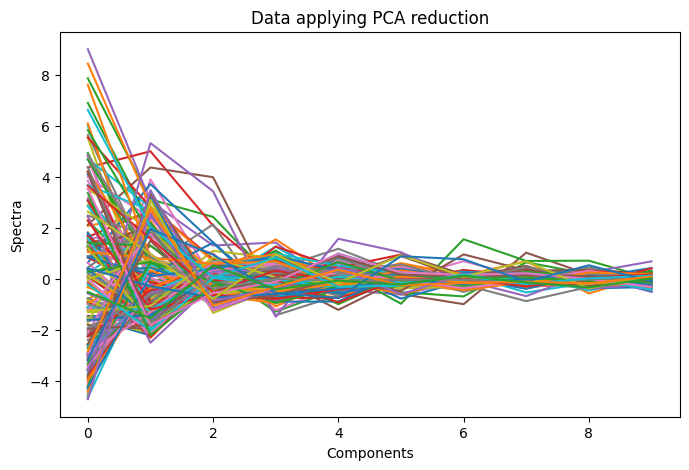

In [22]:
plt.figure(figsize=(8,5))
plt.title("Data applying PCA reduction")
plt.xlabel("Components")
plt.ylabel("Spectra")
plt.plot(pca_transformed_data_t.iloc[:10,:])
plt.show()

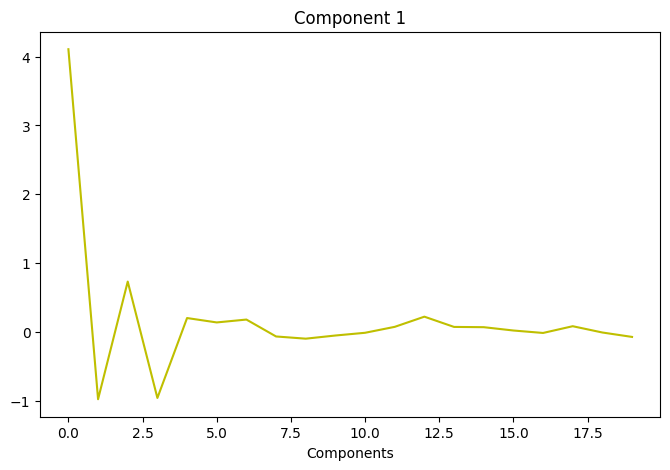

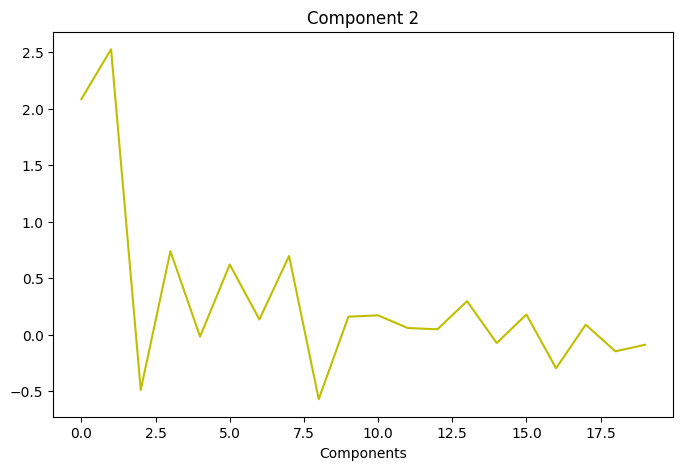

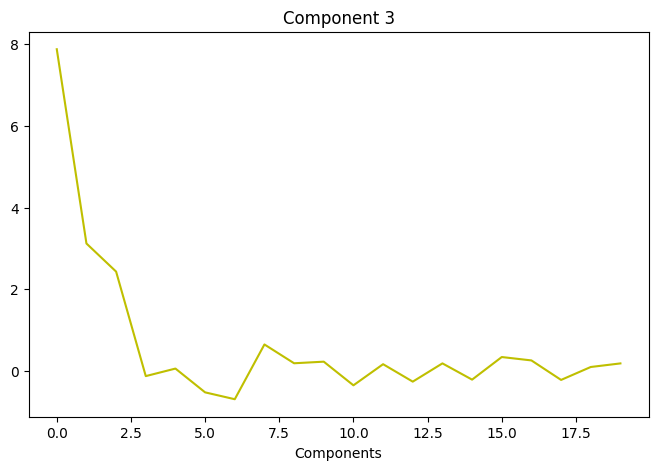

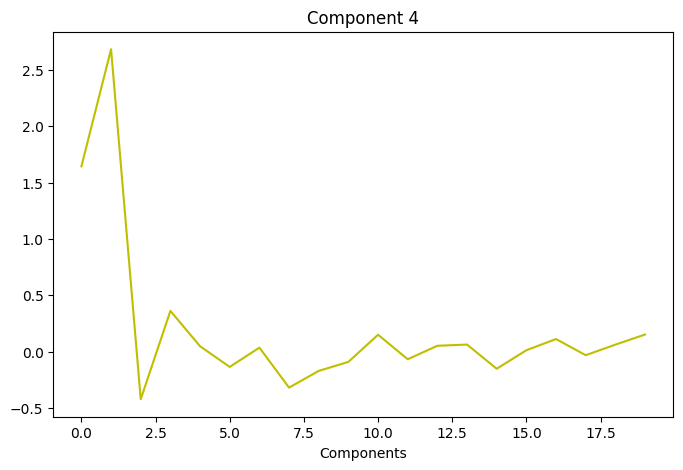

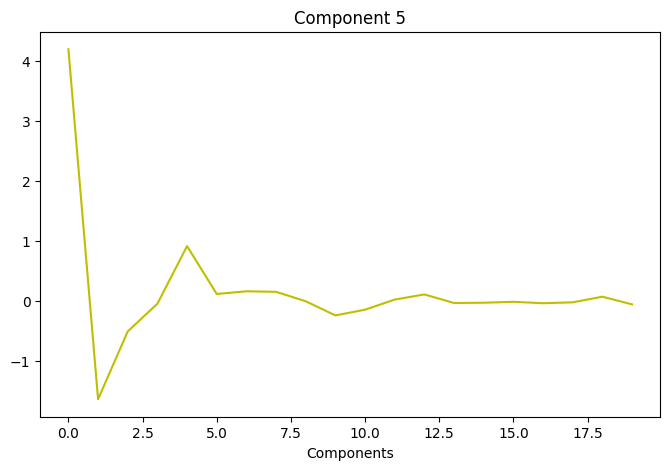

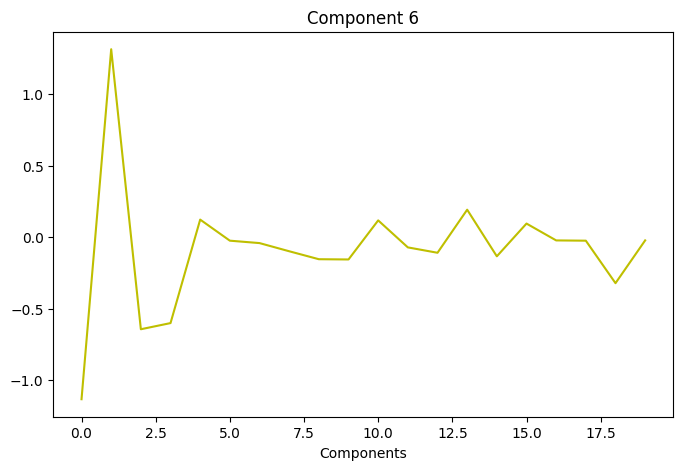

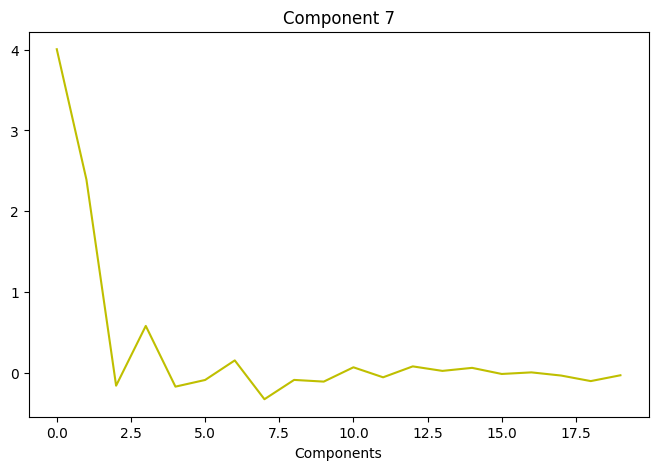

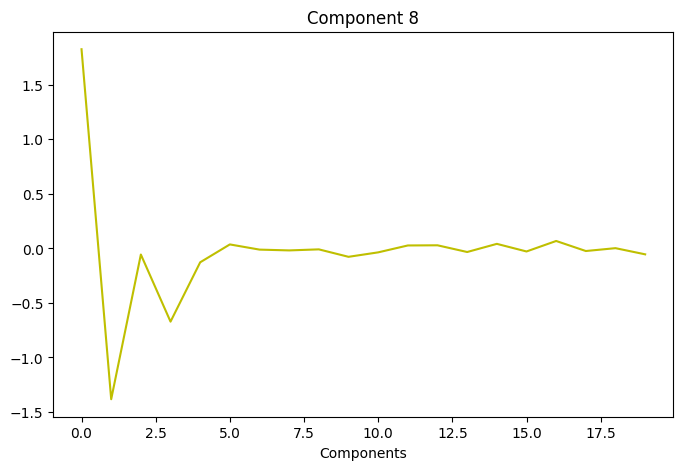

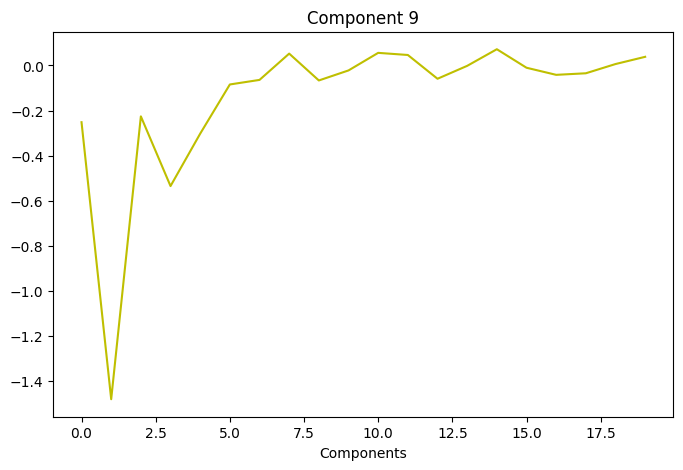

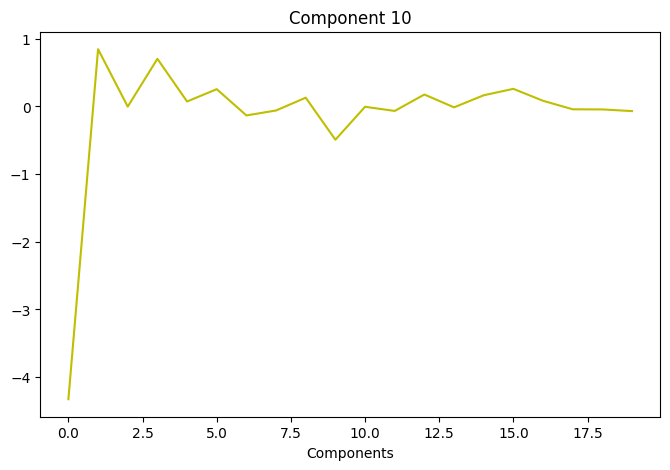

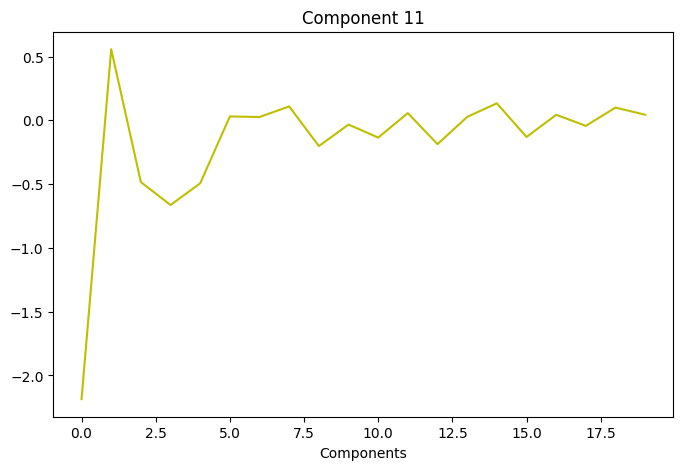

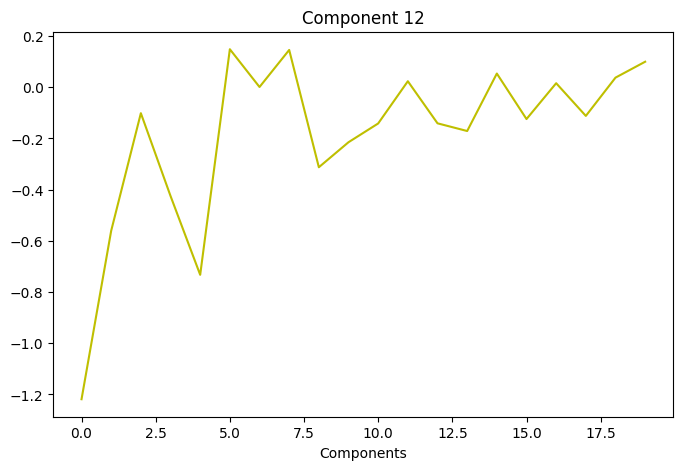

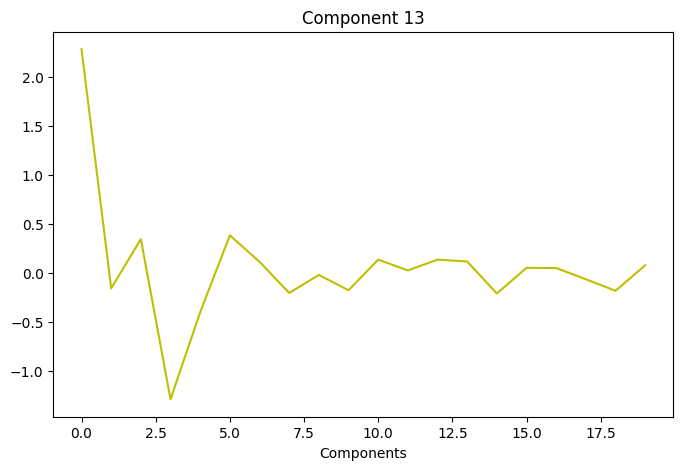

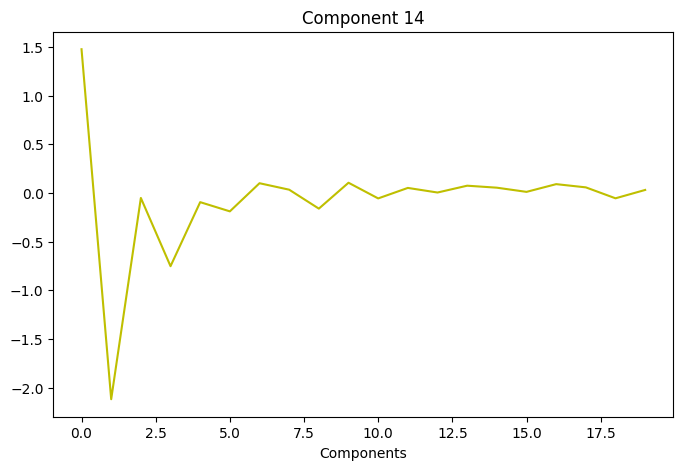

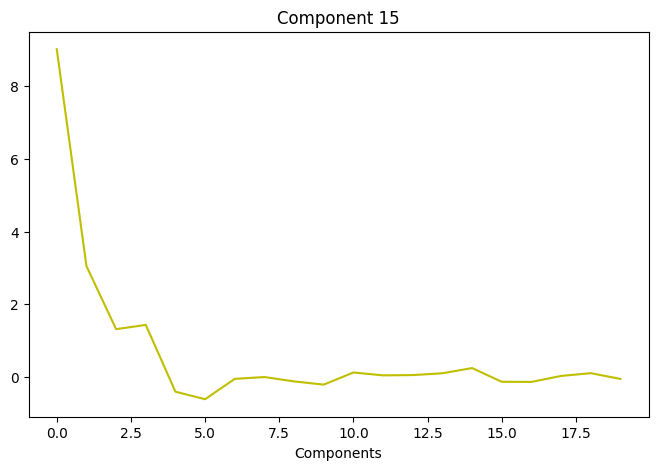

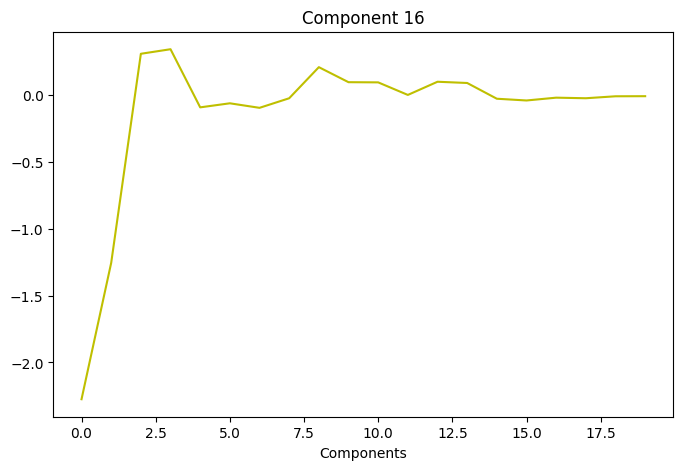

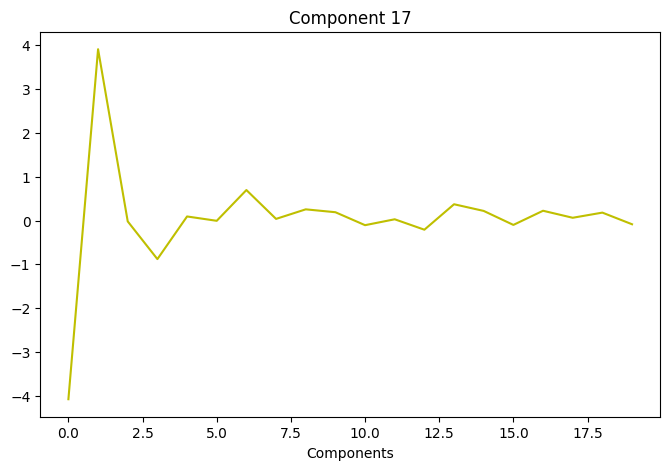

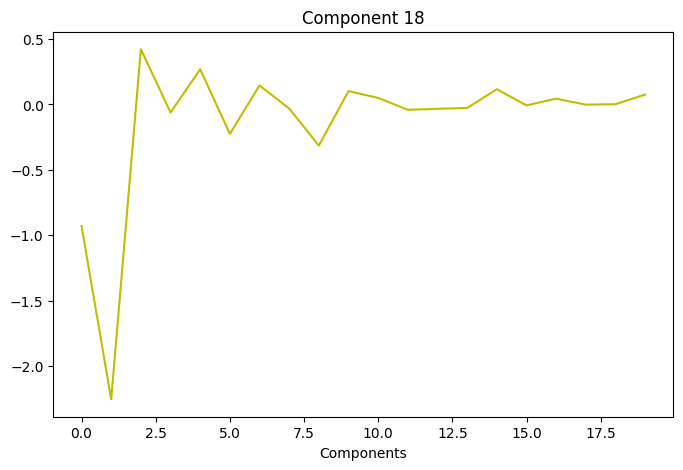

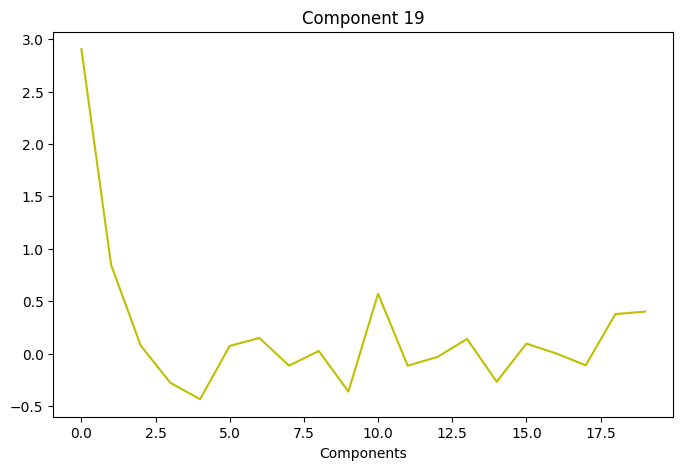

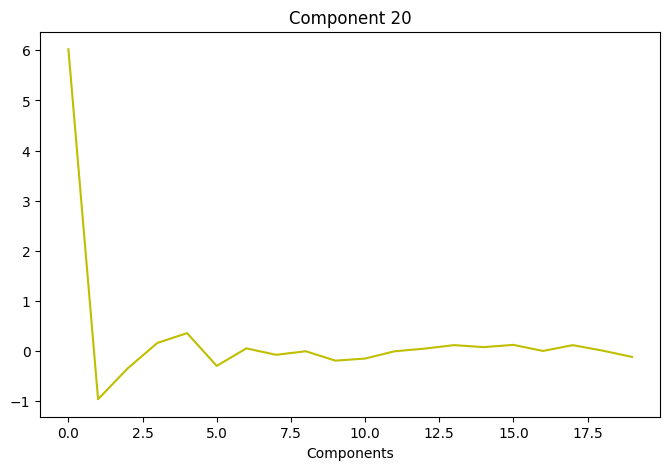

In [24]:
for i in range(1,21):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Components")
    plt.plot(pca_transformed_data_t.iloc[:,i-1:i], '-',markersize=1, color = "y")
    plt.show()

In [59]:
# Perform LLE on the data
lle = LocallyLinearEmbedding(n_components=15, n_neighbors=70)
lle_transformed = lle.fit_transform(data)
lle_transformed_data = pd.DataFrame(lle_transformed)

In [60]:
lle_transformed_data

0         1         2         3         4         5         6   \
0   -0.042783  0.086156  0.134243 -0.044206 -0.071194 -0.108873  0.025125   
1   -0.104544 -0.050823 -0.081886  0.002123  0.008408  0.066765  0.101654   
2   -0.188828  0.018175  0.063097 -0.232162  0.009260 -0.018636 -0.033474   
3   -0.099274 -0.062279 -0.045810  0.004352 -0.000105  0.044858 -0.019251   
4   -0.043894  0.113941 -0.030546  0.042053 -0.138161 -0.134649  0.147591   
..        ...       ...       ...       ...       ...       ...       ...   
188 -0.081527  0.005517 -0.117827  0.031200  0.033567  0.050191  0.085961   
189 -0.167254  0.030411 -0.070401 -0.061412  0.072792  0.064186 -0.004258   
190  0.021922 -0.107219  0.088077 -0.058640  0.116467 -0.195688  0.067877   
191 -0.029691 -0.133923 -0.002747  0.092488 -0.085436  0.077084  0.026128   
192  0.053996  0.040906  0.099091 -0.046776 -0.036565  0.133923  0.065585   

           7         8         9         10        11        12        13  \
0    0.011201 -0.000016 -0.018748  0.044260  0.060389 -0.010981  0.037464   
1   -0.284261  0.019436  0.068187  0.061032  0.064851  0.182858 -0.187303   
2    0.155162  0.054775  0.081173 -0.047562  0.044842  0.086269 -0.047363   
3    0.033693 -0.127997  0.033678  0.042836 -0.007456 -0.112108 -0.017170   
4    0.025909  0.021197  0.003518  0.074207  0.036832 -0.022500 -0.039956   
..        ...       ...       ...       ...       ...       ...       ...   
188 -0.358966  0.038578  0.025443  0.086736  0.050688  0.228109 -0.115488   
189  0.060300 -0.025705  0.008970 -0.041634 -0.036250 -0.003336  0.026124   
190 -0.081406  0.117466  0.096111  0.060202 -0.366914  0.083434  0.088907   
191  0.031208 -0.018311 -0.046403 -0.040728  0.064898 -0.067350 -0.050601   
192 -0.031635 -0.124572 -0.014300  0.016434 -0.007899  0.083170  0.097869   

           14  
0    0.095028  
1    0.046039  
2    0.107462  
3   -0.050775  
4   -0.030633  
..        ...  
188  0.116337  
189 -0.004101  
190 -0.322790  
191 -0.013606  
192 -0.057426  

[193 rows x 15 columns]

In [61]:
lle_transformed_data_t = lle_transformed_data.T

In [28]:
lle_transformed_data_t

0         1         2         3         4         5         6    \
0  -0.042783 -0.104544 -0.188828 -0.099274 -0.043894 -0.019908 -0.131243   
1   0.086156 -0.050823  0.018175 -0.062279  0.113941 -0.063403 -0.018581   
2   0.134243 -0.081886  0.063097 -0.045810 -0.030546  0.045186 -0.053417   
3  -0.044206  0.002123 -0.232162  0.004352  0.042053  0.073346 -0.030236   
4  -0.071194  0.008408  0.009260 -0.000105 -0.138161 -0.041068  0.038823   
5  -0.108873  0.066765 -0.018636  0.044858 -0.134649  0.018567  0.047756   
6   0.025125  0.101654 -0.033474 -0.019251  0.147591 -0.033921 -0.031798   
7   0.011201 -0.284261  0.155162  0.033693  0.025909 -0.004407  0.023770   
8  -0.000016  0.019436  0.054775 -0.127997  0.021197 -0.102462 -0.077032   
9  -0.018748  0.068187  0.081173  0.033678  0.003518 -0.021913  0.020777   
10  0.044260  0.061032 -0.047562  0.042836  0.074207  0.000443  0.015309   
11  0.060389  0.064851  0.044842 -0.007456  0.036832 -0.027696 -0.020218   
12 -0.010981  0.182858  0.086269 -0.112108 -0.022500 -0.054304 -0.076211   
13  0.037464 -0.187303 -0.047363 -0.017170 -0.039956 -0.078562 -0.007156   
14  0.095028  0.046039  0.107462 -0.050775 -0.030633 -0.033726 -0.074583   
15  0.064118  0.002591 -0.150574  0.113334 -0.024947  0.019204  0.091553   
16 -0.069297 -0.028410 -0.027884  0.006068  0.012157 -0.020986  0.017268   
17 -0.085212 -0.060894  0.136861 -0.080276 -0.008614  0.042051 -0.106198   
18  0.018351 -0.017283  0.131944 -0.140867  0.006935 -0.028691 -0.093470   
19  0.097206  0.024086  0.016822  0.028225 -0.035514 -0.027277  0.002063   

         7         8         9    ...       183       184       185       186  \
0  -0.001077  0.037374  0.059173  ... -0.109237 -0.009864 -0.041564 -0.029307   
1   0.064900  0.038510 -0.083729  ...  0.000962 -0.181056  0.118756  0.110071   
2   0.085328  0.069047 -0.098396  ... -0.048760  0.006958 -0.046450 -0.027012   
3   0.037348  0.062702 -0.020432  ...  0.013237  0.082429  0.048025  0.054872   
4  -0.000143  0.048776  0.013866  ...  0.043826 -0.099329 -0.126136 -0.154493   
5  -0.021702  0.040561 -0.176846  ...  0.031432  0.064204 -0.130346 -0.158281   
6  -0.016919 -0.044597 -0.032124  ... -0.019933  0.053697  0.149507  0.170751   
7  -0.019525 -0.004104  0.021153  ...  0.015507  0.085965  0.027755  0.002921   
8   0.013806 -0.051788 -0.125436  ... -0.029218  0.060153  0.057981  0.016325   
9  -0.049508  0.046090 -0.017177  ... -0.048630 -0.031623 -0.015575  0.014919   
10 -0.039823 -0.037922 -0.113255  ... -0.027082  0.021111  0.048581  0.092235   
11 -0.002832 -0.043618 -0.006197  ... -0.030470 -0.053869  0.031249  0.046523   
12  0.055847  0.044305  0.185300  ... -0.116958  0.018339 -0.042087 -0.039819   
13 -0.026313 -0.082142  0.099196  ...  0.074205  0.028484  0.013504 -0.052363   
14  0.047416 -0.032910 -0.062206  ... -0.089621  0.212251 -0.056407 -0.056097   
15  0.003415 -0.047260 -0.004349  ...  0.068153  0.001416 -0.051237 -0.062397   
16  0.027483 -0.001802  0.055373  ...  0.005406  0.090102  0.026834  0.043322   
17 -0.003265  0.028903 -0.133773  ... -0.045054 -0.020212  0.026665 -0.005994   
18 -0.058631  0.085950  0.052812  ... -0.011895  0.025415  0.038267  0.025142   
19  0.015296 -0.048355  0.030266  ... -0.010989 -0.007580 -0.047514 -0.081704   

         187       188       189       190       191       192  
0  -0.111340 -0.081527 -0.167254  0.021922 -0.029691  0.053996  
1   0.040091  0.005517  0.030411 -0.107219 -0.133923  0.040906  
2  -0.006419 -0.117827 -0.070401  0.088077 -0.002747  0.099091  
3   0.004416  0.031200 -0.061412 -0.058640  0.092488 -0.046776  
4   0.025819  0.033567  0.072792  0.116467 -0.085436 -0.036565  
5  -0.014419  0.050191  0.064186 -0.195688  0.077084  0.133923  
6   0.001554  0.085961 -0.004258  0.067877  0.026128  0.065585  
7   0.022920 -0.358966  0.060300 -0.081406  0.031208 -0.031635  
8  -0.033248  0.038578 -0.025705  0.117466 -0.018311 -0.124572  
9  -0.064660  0.025443  0.008970  0.096111 -0.046403 -0.0143

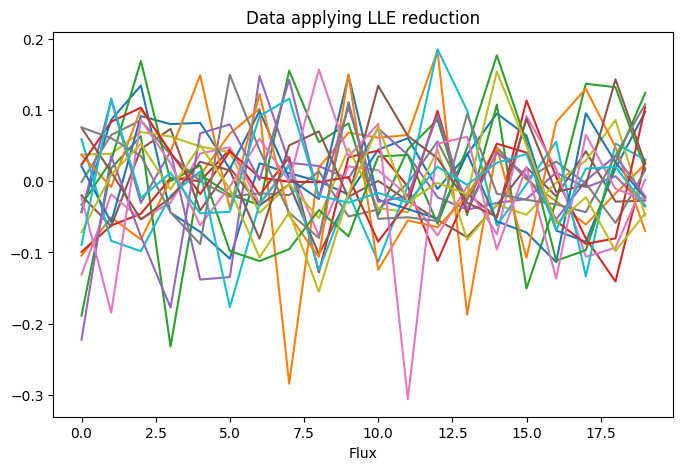

In [29]:
plt.figure(figsize=(8,5))
plt.title("Data applying LLE reduction")
plt.xlabel("Flux")
plt.plot(lle_transformed_data_t.iloc[:,:20])
plt.show()

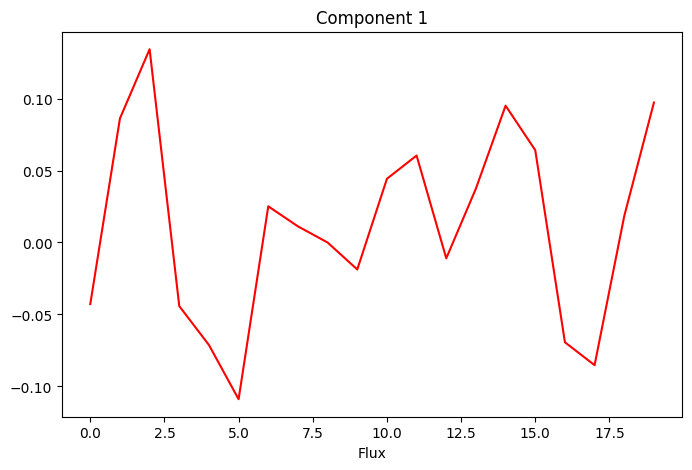

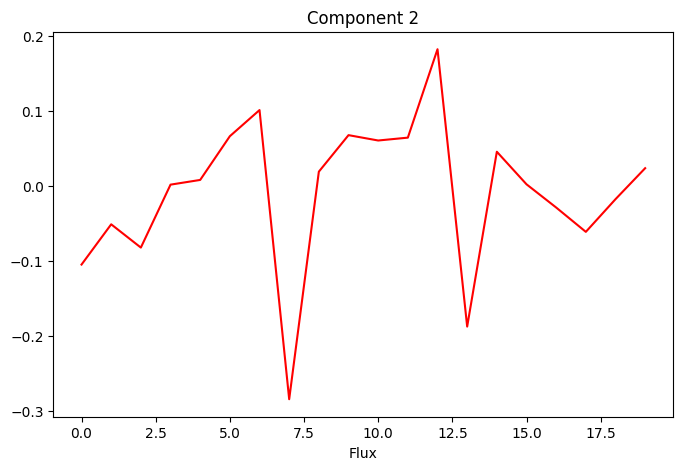

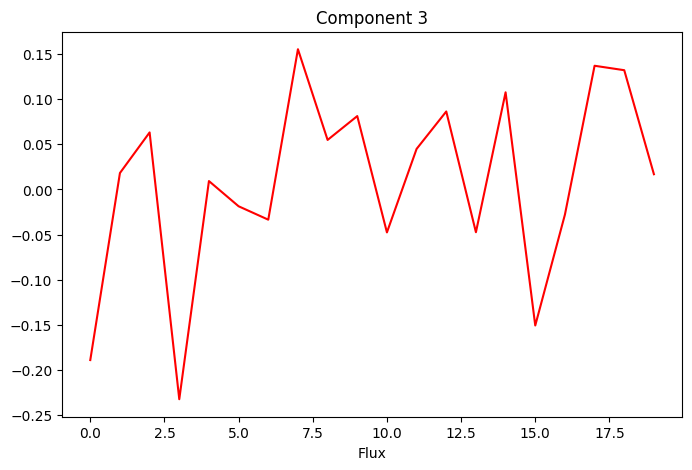

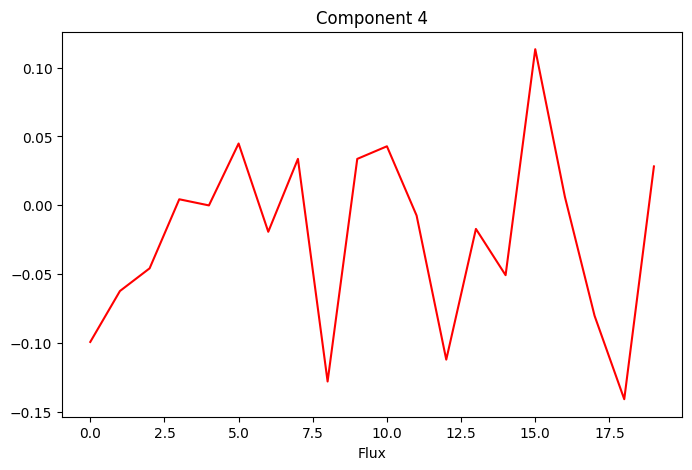

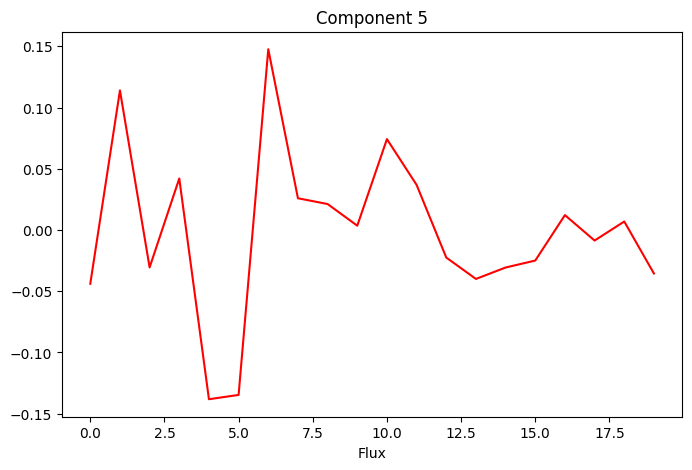

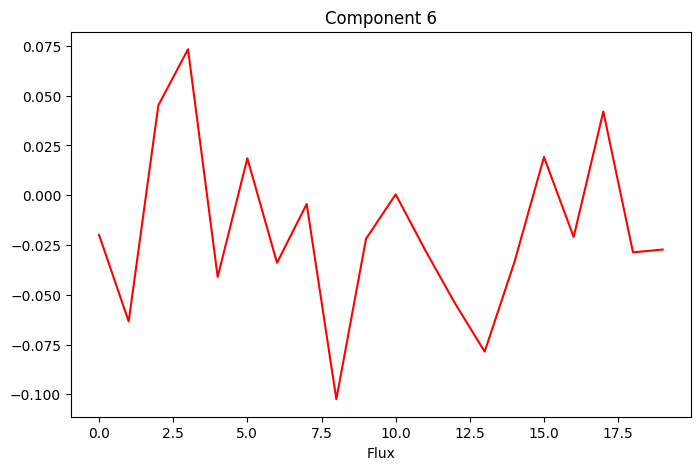

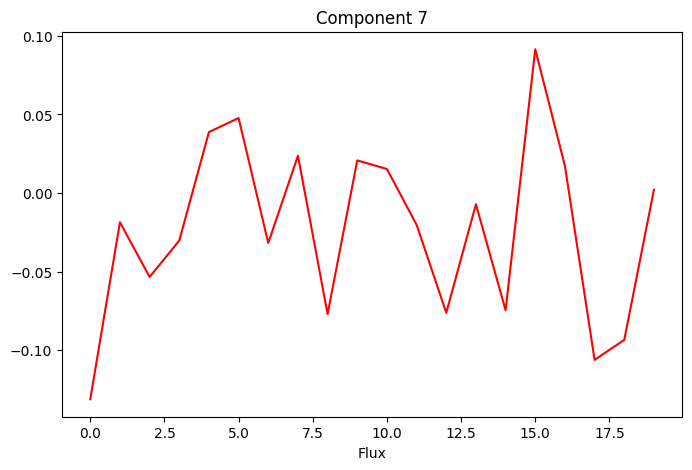

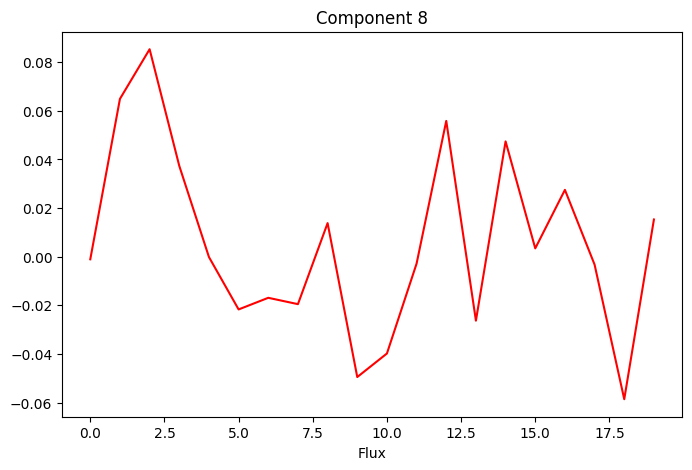

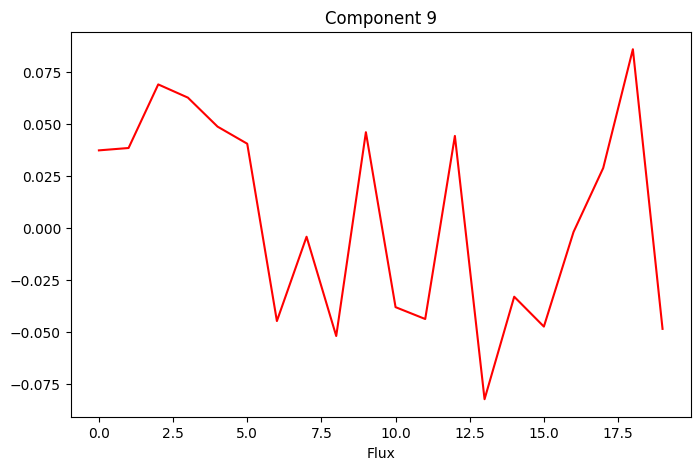

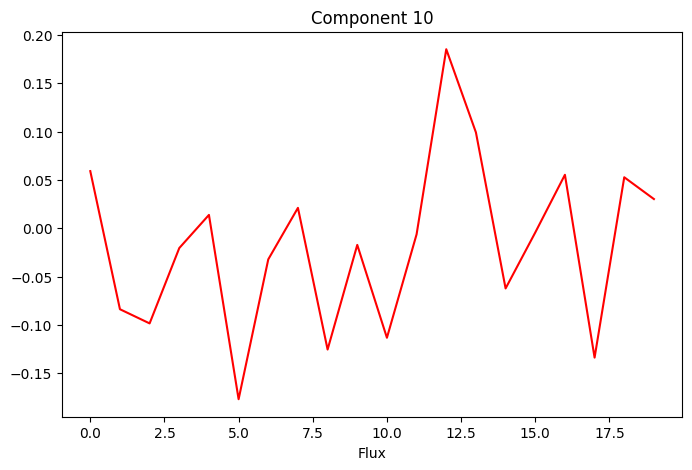

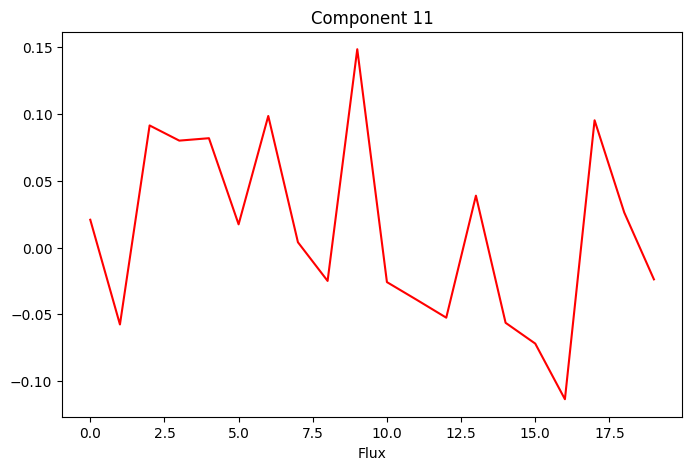

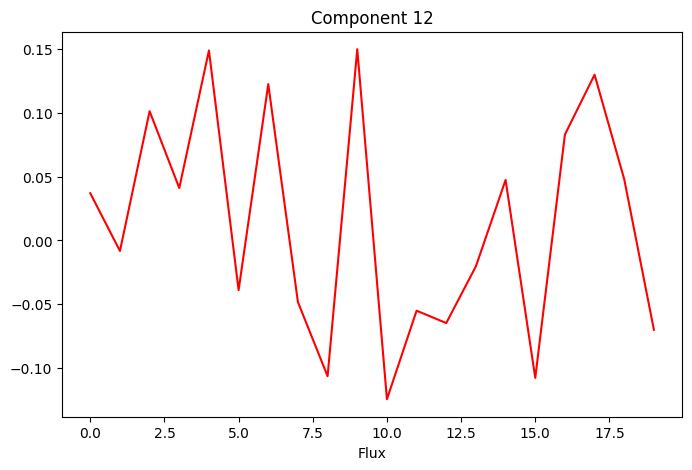

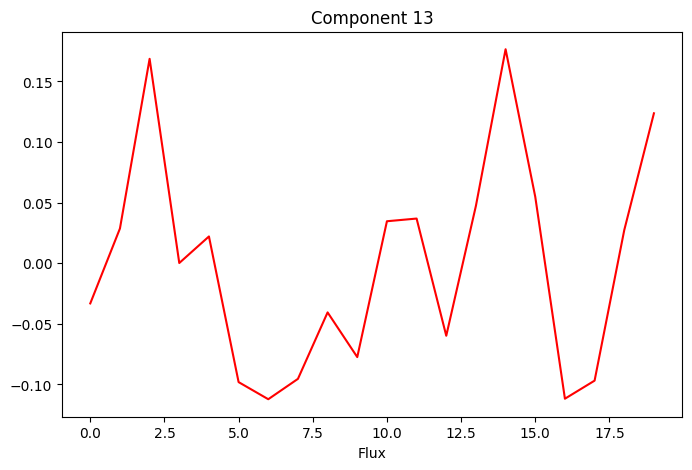

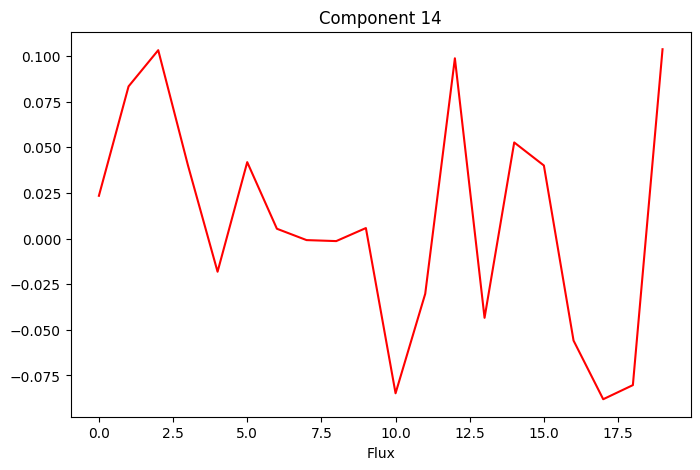

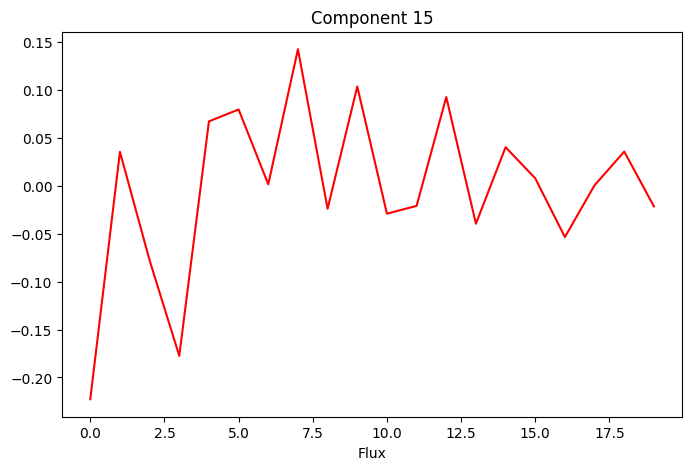

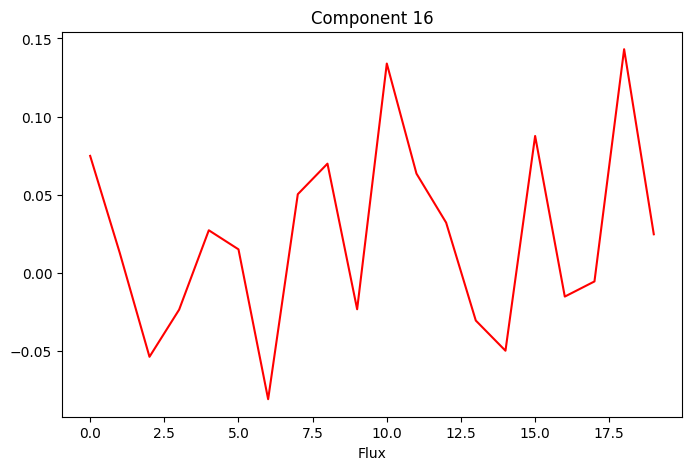

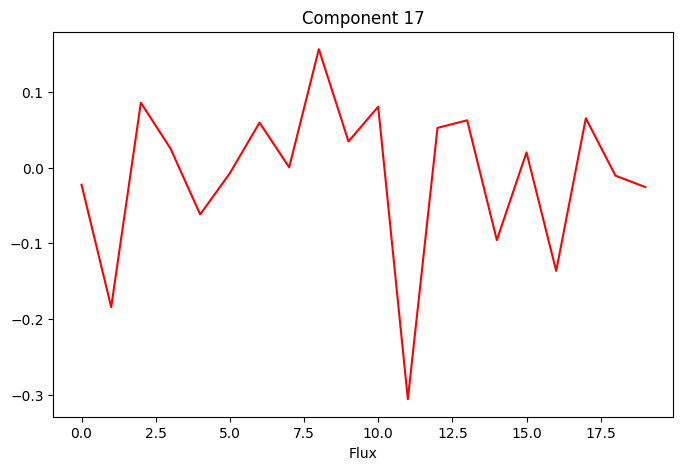

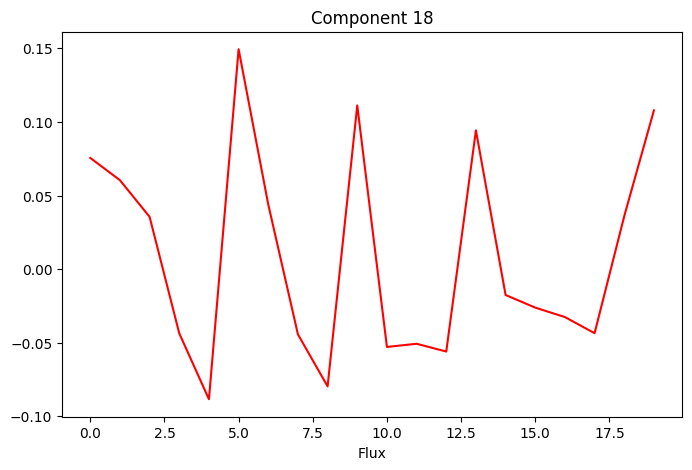

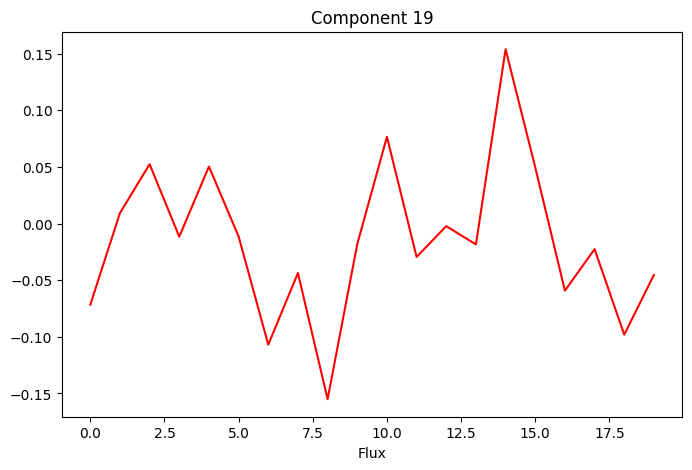

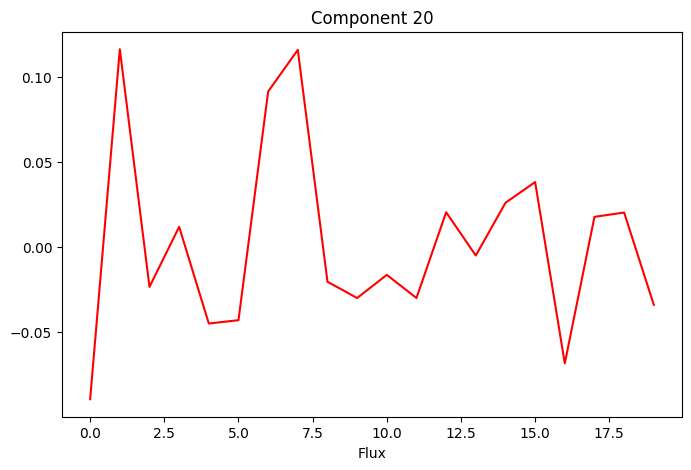

In [30]:
for i in range(1,21):
    plt.figure(figsize=(8,5))
    plt.title(f"Component {i}")
    plt.xlabel("Flux")
    plt.plot(lle_transformed_data_t.iloc[:, i-1:i], '-',markersize=1, color = "r")
    plt.show()

In [48]:
# Perform HLLE on the data
#for method hessian, n_neighbours must be a greater than [n_components * (n_components +3) /2 ]
hlle = LocallyLinearEmbedding(n_components=15, n_neighbors=140, method='hessian', eigen_solver='dense')
hlle_transformed = hlle.fit_transform(data)
hlle_transformed_data = pd.DataFrame(hlle_transformed)

In [49]:
hlle_transformed_data

0         1         2         3         4         5         6   \
0    0.069337  0.078407 -0.116042  0.007910  0.071806 -0.033492  0.063632   
1    0.087032 -0.074827  0.102945  0.047350 -0.136029 -0.187849  0.148021   
2    0.206780 -0.019980 -0.144897  0.171802  0.029725  0.105418 -0.182411   
3    0.080050 -0.084384  0.048989 -0.002399  0.010186 -0.039758 -0.022779   
4    0.059737  0.096149  0.082429 -0.013612  0.133882 -0.058809  0.074159   
..        ...       ...       ...       ...       ...       ...       ...   
188  0.073677 -0.014183  0.147497  0.040256 -0.185367 -0.132305  0.222983   
189  0.169641 -0.007314  0.044671  0.051820 -0.054256 -0.001974 -0.113010   
190 -0.030596 -0.098105 -0.133542  0.045830 -0.106450  0.077604  0.194647   
191 -0.007422 -0.137567  0.038161 -0.097661  0.078979 -0.055576 -0.067566   
192 -0.037898  0.054108 -0.089558  0.007040  0.003586 -0.129494 -0.028172   

           7         8         9         10        11        12        13  \
0   -0.025459 -0.000119  0.020960 -0.004725  0.042329  0.036385 -0.118591   
1   -0.190113 -0.063503 -0.034764 -0.112347 -0.120179 -0.114981 -0.266968   
2   -0.238037  0.079744 -0.140243 -0.072731 -0.149605 -0.314730  0.131681   
3    0.123975 -0.038246  0.028011  0.016927 -0.063045 -0.029046 -0.027415   
4   -0.025861  0.132380 -0.024203 -0.003709  0.015783  0.032470 -0.042206   
..        ...       ...       ...       ...       ...       ...       ...   
188 -0.157311 -0.081600 -0.075986 -0.096855 -0.040435 -0.026271 -0.084174   
189  0.058329 -0.043706  0.088538  0.013276 -0.017852 -0.035502 -0.030912   
190 -0.006331  0.138682  0.334615 -0.049857  0.061098 -0.079514  0.146465   
191 -0.017106 -0.000984  0.015873  0.071422 -0.082668 -0.030161  0.007507   
192  0.073337 -0.095133 -0.026335  0.009848  0.003263  0.042895  0.026684   

           14  
0    0.014442  
1    0.039803  
2   -0.021419  
3   -0.036447  
4    0.008565  
..        ...  
188  0.006238  
189  0.023798  
190  0.502753  
191 -0.001030  
192  0.028730  

[193 rows x 15 columns]

In [50]:
hlle_transformed_data_t = hlle_transformed_data.T

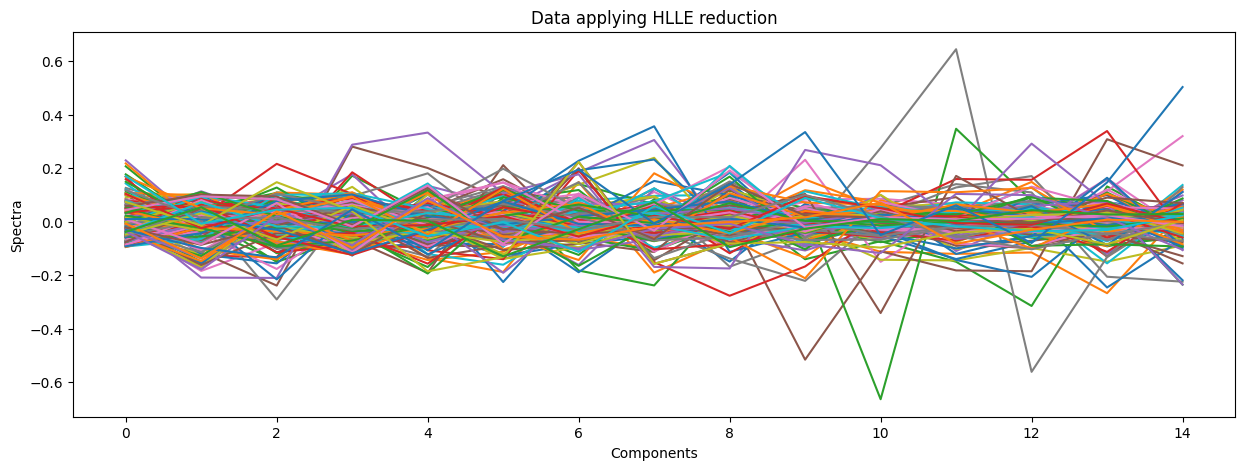

In [51]:
plt.figure(figsize=(15,5))
plt.title("Data applying HLLE reduction")
plt.xlabel("Components")
plt.ylabel("Spectra")
plt.plot(hlle_transformed_data_t.iloc[:,:])
plt.show()

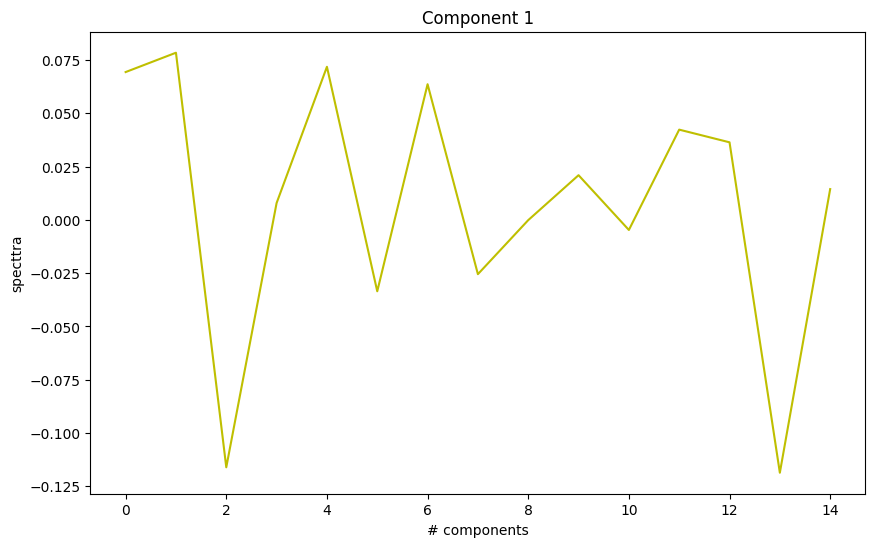

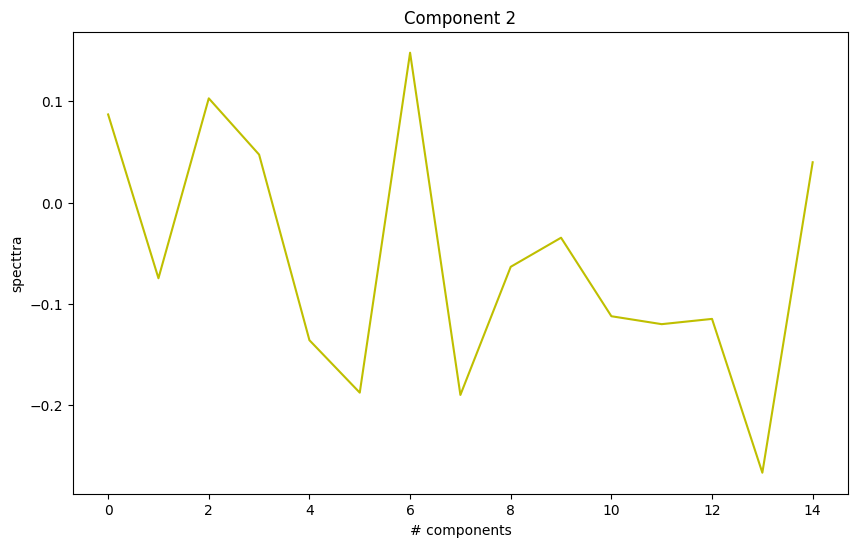

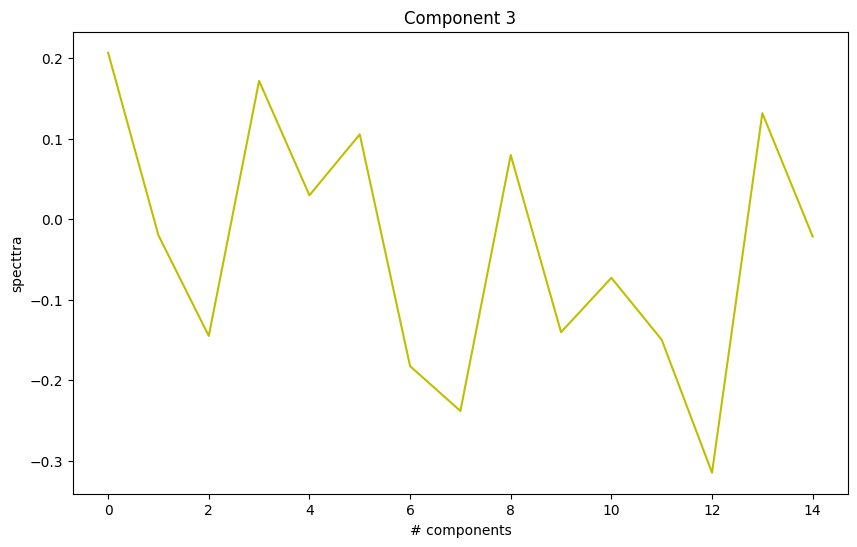

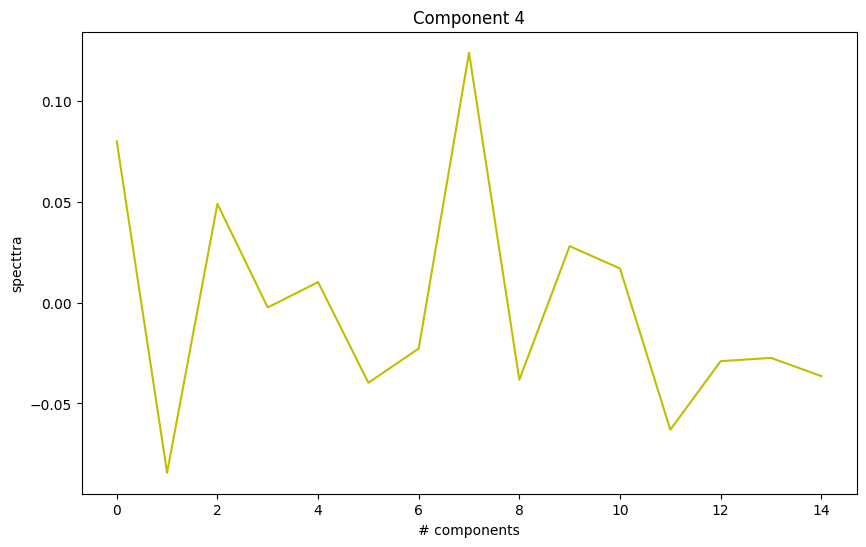

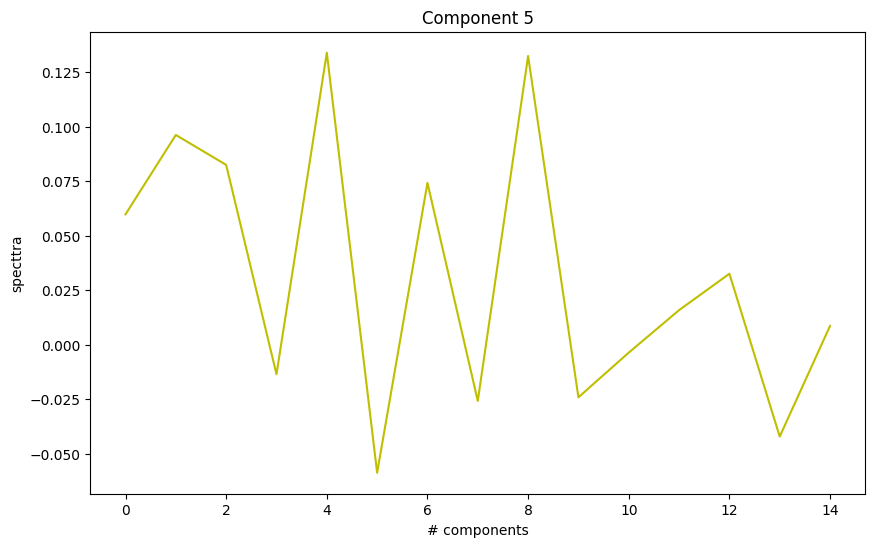

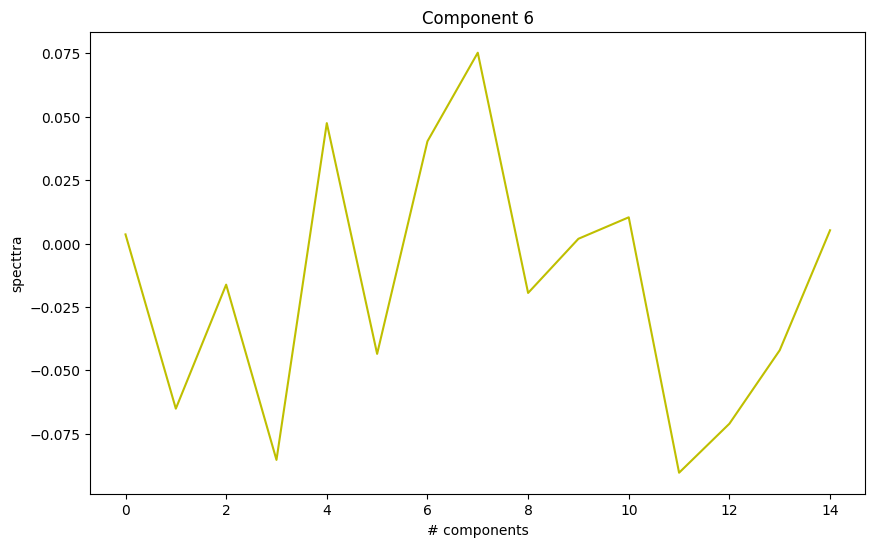

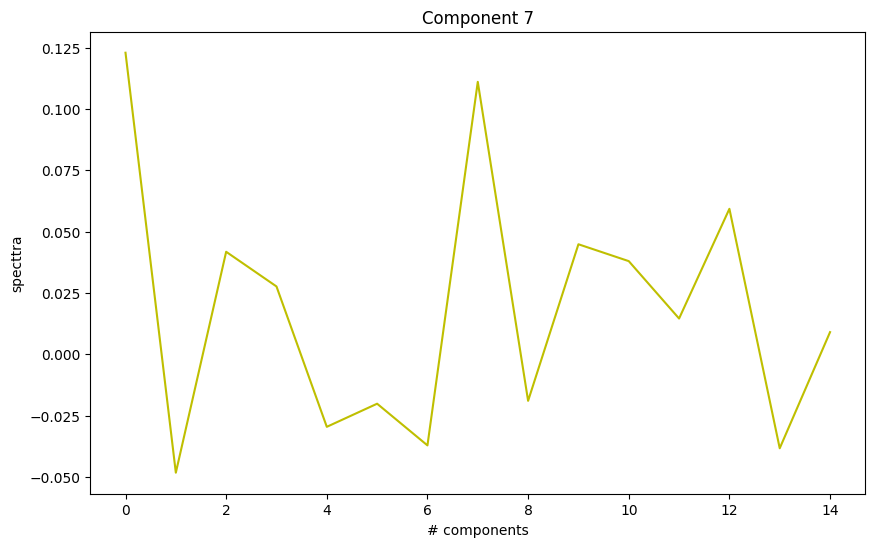

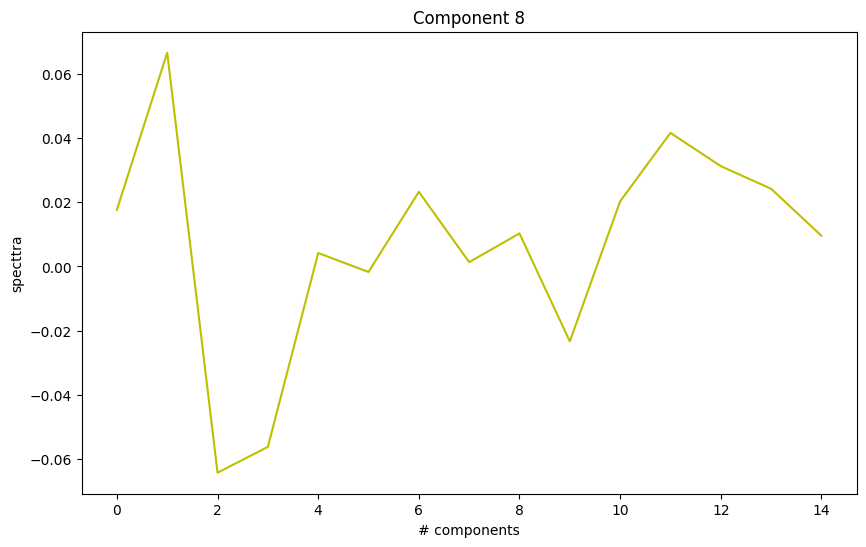

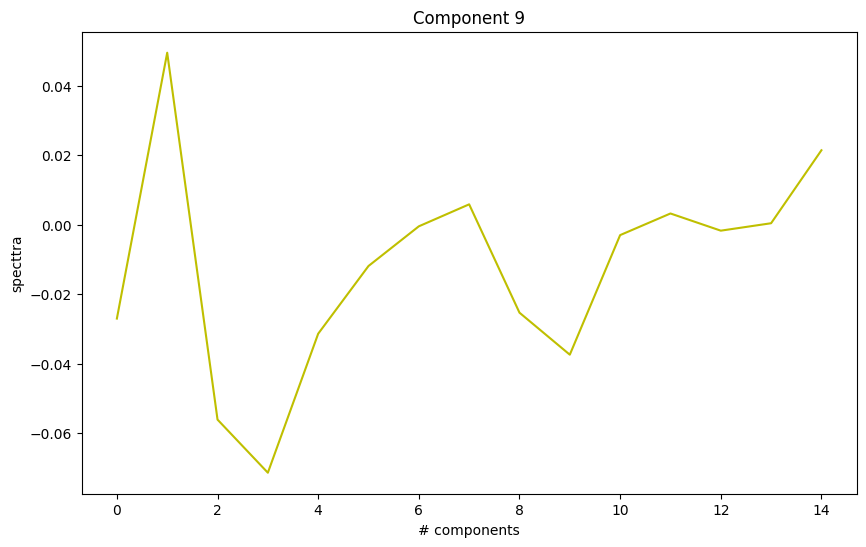

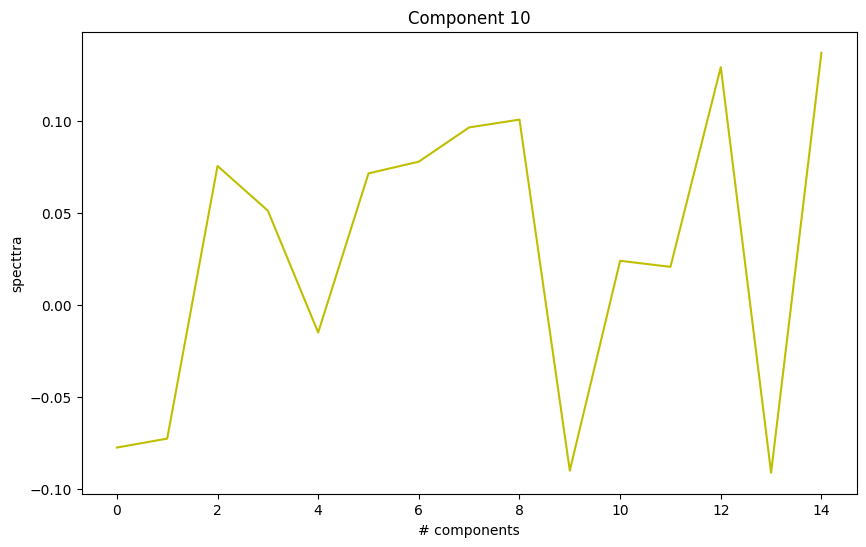

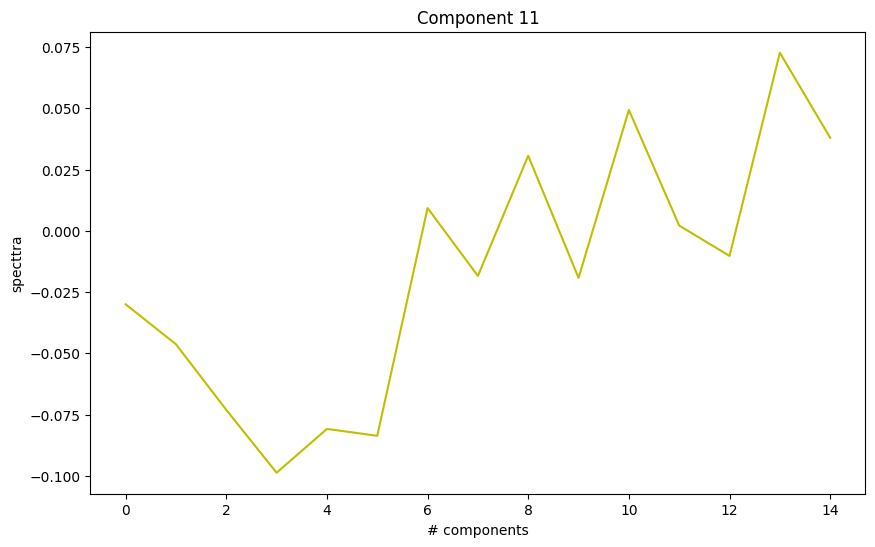

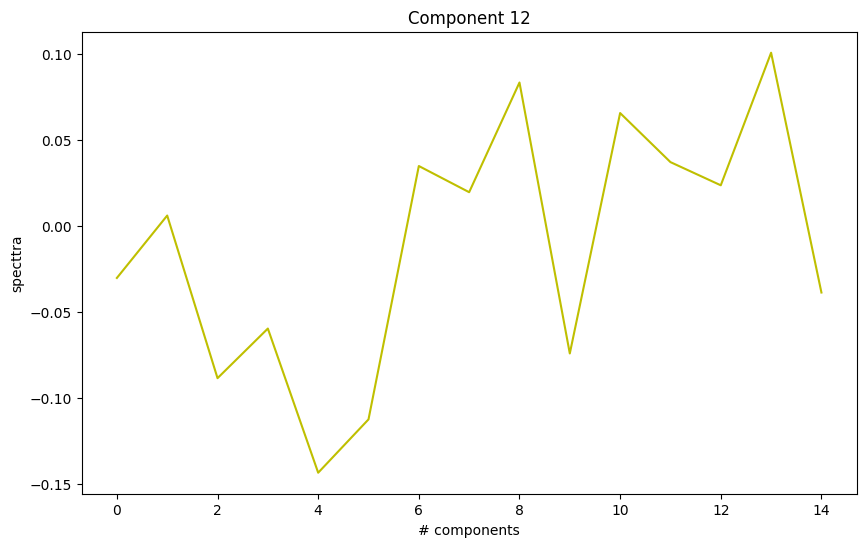

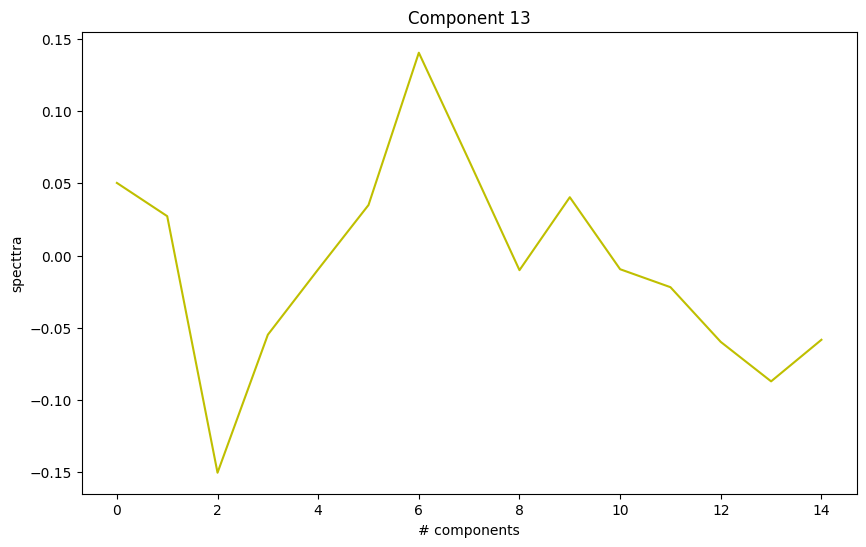

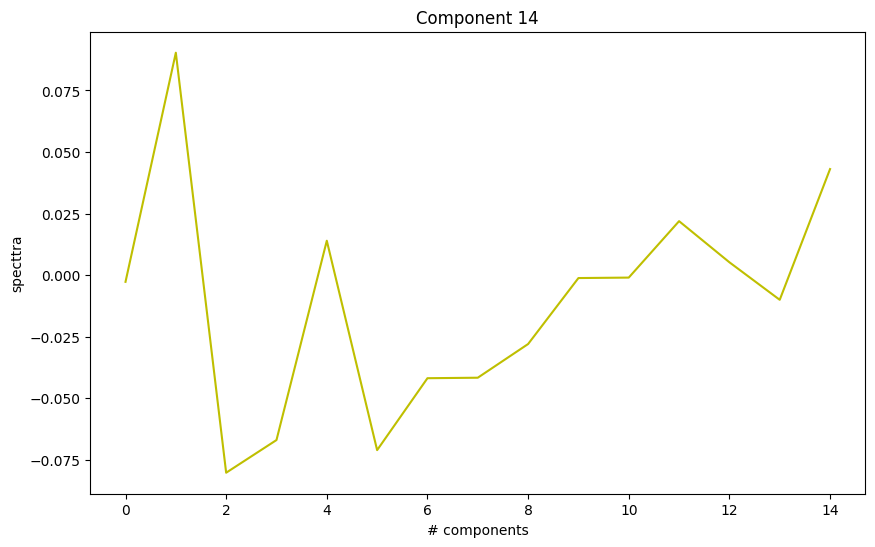

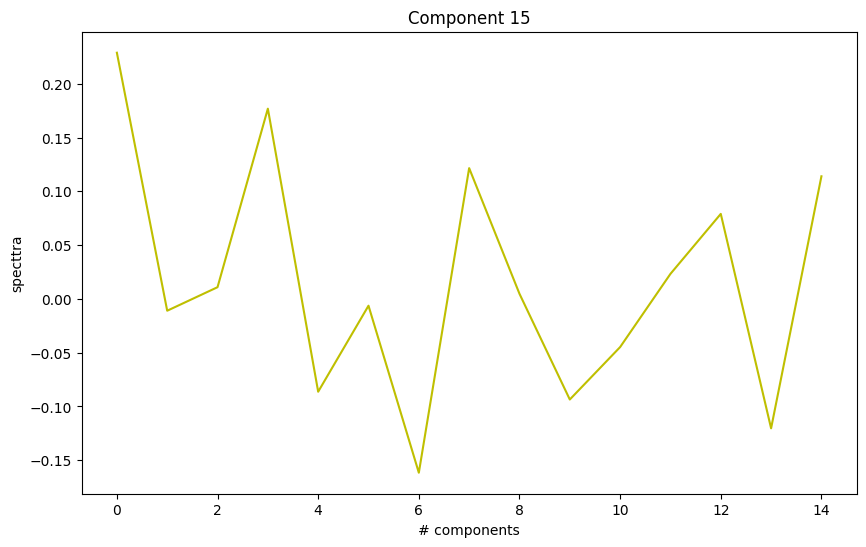

In [55]:
for i in range(1,16):
    plt.figure(figsize=(10,6))
    plt.title(f"Component {i}")
    plt.xlabel("# components")
    plt.ylabel("specttra")
    plt.plot(hlle_transformed_data_t.iloc[:, i-1:i], '-',markersize=1, color = "y")
    plt.show()

C:\Users\joshp\AppData\Local\Temp\ipykernel_15900\2876037441.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


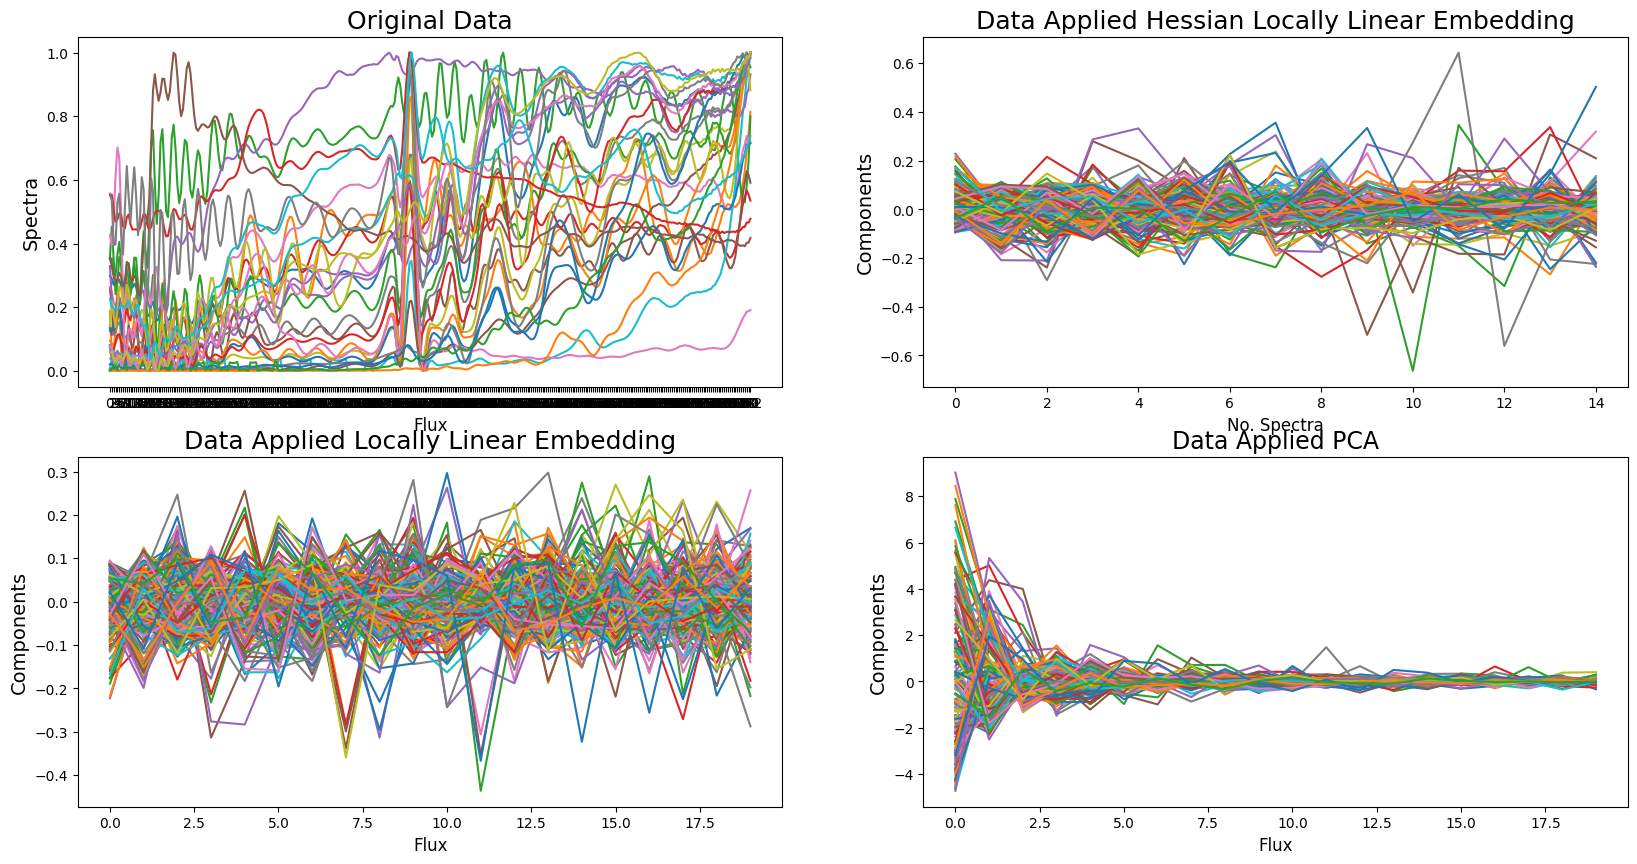

In [56]:
fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Spectra", fontsize=14)
ax[0,0].set_xlabel("Flux", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:30])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Components", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data_t)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Components", fontsize=14)
ax[1,0].set_xlabel("Flux", fontsize=12)
ax[1,0].plot(lle_transformed_data_t)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Components", fontsize=14)
ax[1,1].set_xlabel("Flux", fontsize=12)
ax[1,1].plot(pca_transformed_data_t)

fig.show()
#plt.plot(lle_transformed[0:20])
#plt.plot(data[0:100:5])


C:\Users\joshp\AppData\Local\Temp\ipykernel_26540\393995572.py:25: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


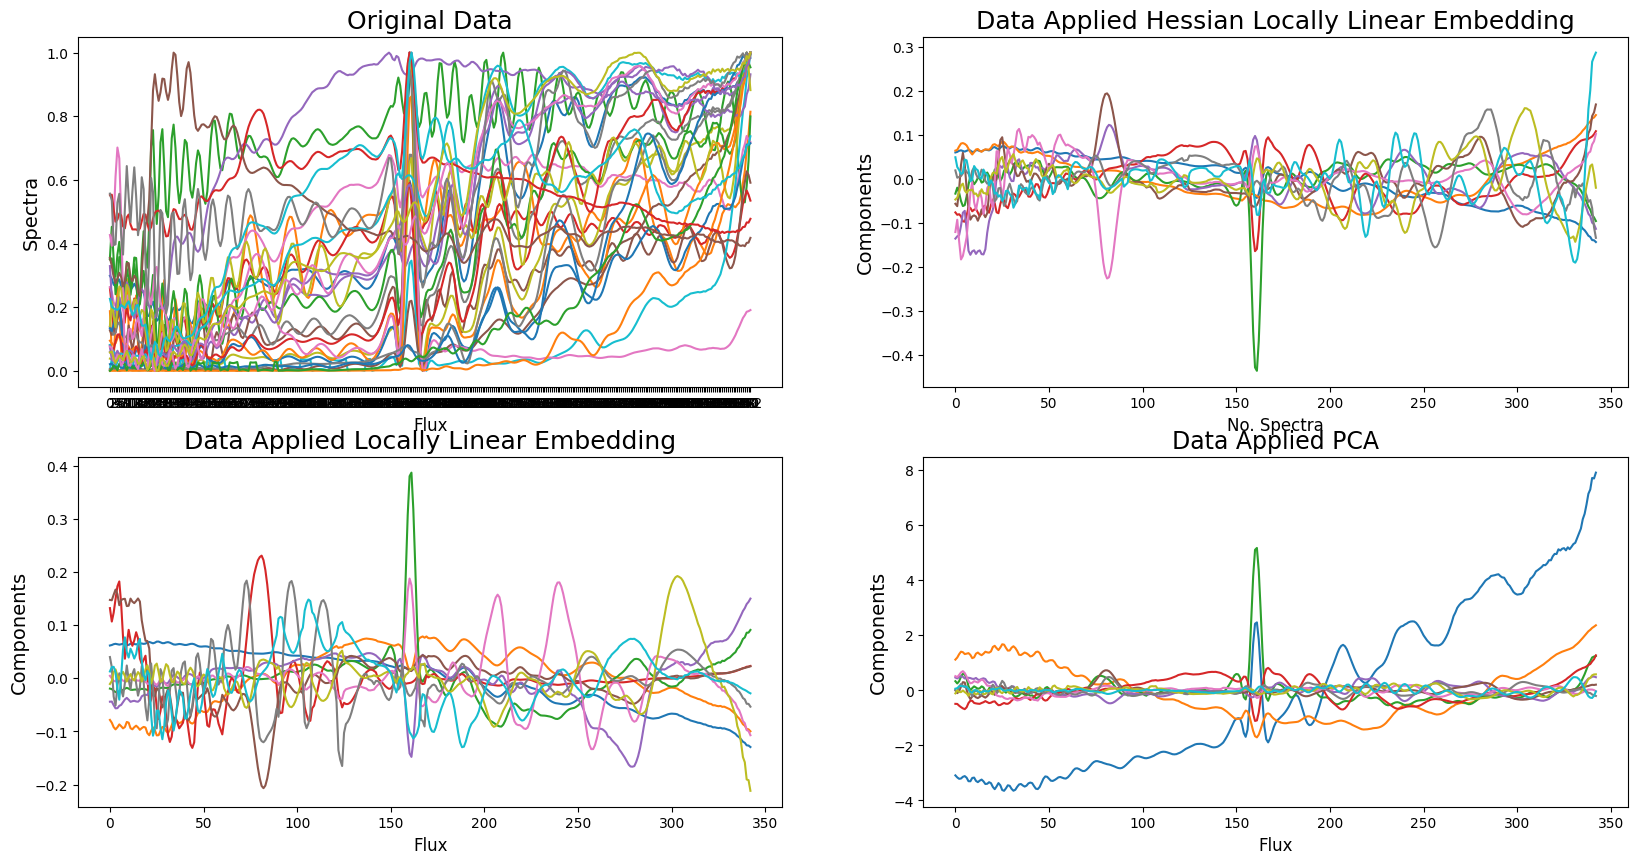

In [32]:
fig =  plt.figure(figsize=(20,10))
ax = fig.subplots(2,2)
ax[0,0].set_title("Original Data", fontsize=18)
ax[0,0].set_ylabel("Spectra", fontsize=14)
ax[0,0].set_xlabel("Flux", fontsize=12)
ax[0,0].plot(data_t.iloc[:,:30])

ax[0,1].set_title("Data Applied Hessian Locally Linear Embedding", fontsize=18)
ax[0,1].set_ylabel("Components", fontsize=14)
ax[0,1].set_xlabel("No. Spectra", fontsize=12)
ax[0,1].plot(hlle_transformed_data)


ax[1,0].set_title("Data Applied Locally Linear Embedding", fontsize=18)
ax[1,0].set_ylabel("Components", fontsize=14)
ax[1,0].set_xlabel("Flux", fontsize=12)
ax[1,0].plot(lle_transformed_data)

#PCA
ax[1,1].set_title("Data Applied PCA", fontsize=17)
ax[1,1].set_ylabel("Components", fontsize=14)
ax[1,1].set_xlabel("Flux", fontsize=12)
ax[1,1].plot(pca_transformed_data)

fig.show()
#plt.plot(lle_transformed[0:20])
#plt.plot(data[0:100:5])


In [65]:
joblib.dump(pca_transformed_data, 'modelo_pca_SY.pkl') # Guardo el modelo.

['modelo_pca_SY.pkl']

In [62]:
joblib.dump(lle_transformed_data, 'modelo_LLE_SY.pkl') # Guardo el modelo.

['modelo_LLE_SY.pkl']

In [63]:
joblib.dump(hlle_transformed_data, 'modelo_HLLE_SY.pkl') # Guardo el modelo.

['modelo_HLLE_SY.pkl']